In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcc2doeXNcTXkgRHJpdmUgKHNnaHlzZWxpQHN0dWRlbnQudWJjLmNhKVxxdWFydG9cZ2l0aHViaW9cY29udGVudFxlb3NjNTU1XGxlY3R1cmVzXGxlY3R1cmUz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\sghys\AppData\Local\Temp\ipykernel_27404\2406774753.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap_external.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\zipimport.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\codecs.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\aliases.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\__init__.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\utf_8.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\cp1252.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\io.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\stat.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\_collections_abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\

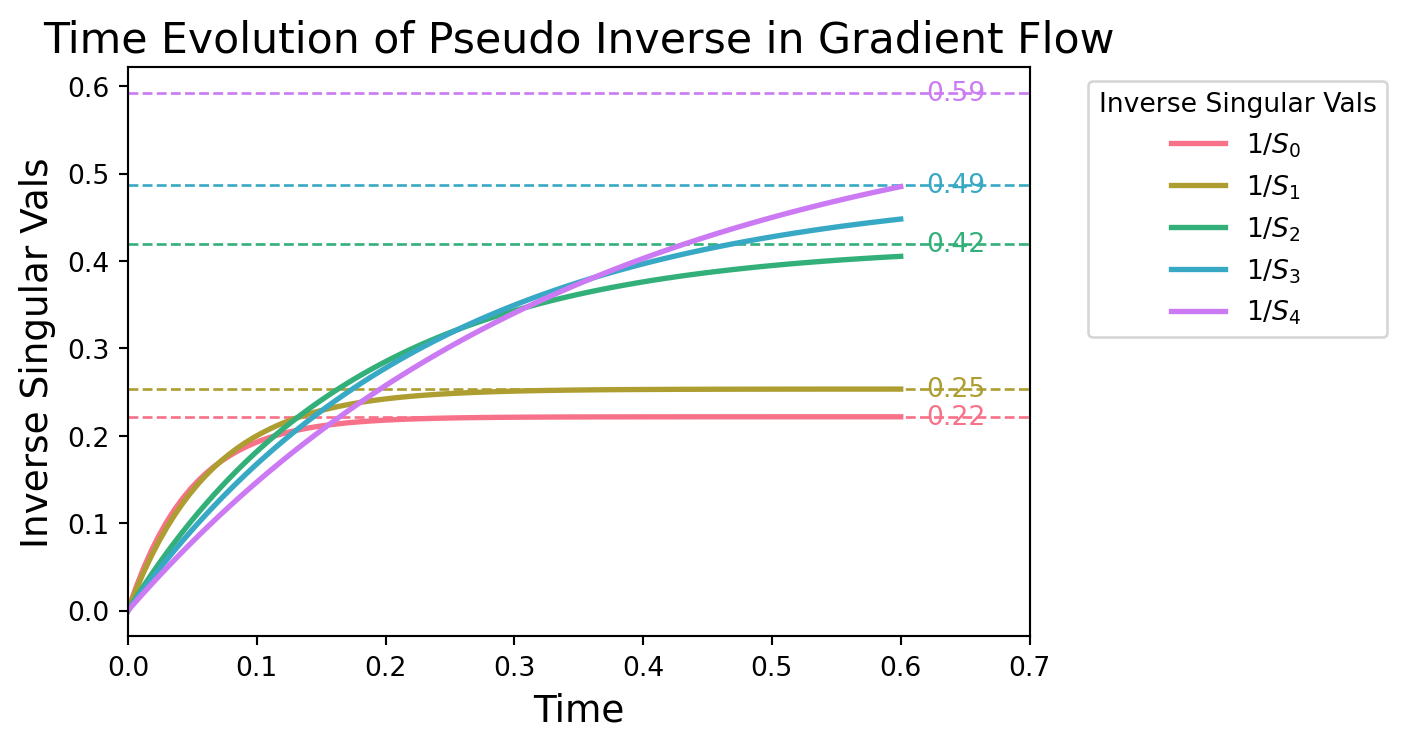

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(4)
# Create a 5x10 matrix A with random values
A = np.random.randn(5, 10)
# Create a vector b of size 5 with random values
b = np.random.randn(5)

# Compute the SVD of A
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Create a time dependent vector of the singular values
def St(t):
    Sdim = S[:, np.newaxis]
    return (1 - np.exp(-Sdim**2*t)) / Sdim

# Compute the time evolution of the values and plot them on a log scale y axis with a linear time x axis
t = np.linspace(0, .6, 100)
T = t[np.newaxis, :]

singular_vals_t = St(T)

# Initialize the plot
plt.figure(figsize=(7.5, 4))

# Create a color palette
palette = sns.color_palette("husl", len(S))

# Plot the singular values and their asymptotes
for i in range(len(S)):
    # Plot the time evolution of each singular value
    sns.lineplot(x=t, y=singular_vals_t[i, :], color=palette[i], linewidth=2, label=f'$1/S_{i}$ ')
    
    Sinv = 1/S[i]

    # Add a horizontal asymptote at the original singular value
    plt.axhline(y=Sinv, color=palette[i], linestyle='--', linewidth=1)
    
    # Annotate the asymptote with the singular value
    plt.text(t[-1] + 0.02, Sinv, f'{Sinv:.2f}', color=palette[i], va='center')

# Configure plot aesthetics
plt.xlabel('Time', fontsize=14)
plt.ylabel('Inverse Singular Vals', fontsize=14)
plt.title('Time Evolution of Pseudo Inverse in Gradient Flow', fontsize=16)
plt.legend(title='Inverse Singular Vals', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(t[0], t[-1] + 0.1)
plt.tight_layout()
plt.savefig('imgs/pseudo_inverse_time_evolution.png')
plt.show()

In [3]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
import numpy as np
import torch.optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import copy

import seaborn as sns

import math
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch.fft

class gaussianConv(nn.Module):
    """
    A PyTorch module that applies a Gaussian convolution to an input image using 
    a parameterized Gaussian Point Spread Function (PSF). The PSF is derived 
    from a covariance matrix and the derivatives of the Gaussian are computed 
    for edge detection.

    Args:
        C (torch.Tensor): Inverse of covariance matrix used to define the shape of the Gaussian.
        t (float, optional): Scaling factor for the Gaussian, default is np.exp(5).
        n0 (float, optional): Scaling factor for the original PSF, default is 1.
        nx (float, optional): Scaling factor for the derivative along the x-axis, default is 1.
        ny (float, optional): Scaling factor for the derivative along the y-axis, default is 1.
    """
    def __init__(self, C, t=np.exp(5), n0=1, nx=1, ny=1):
        super(gaussianConv, self).__init__()

        self.C = C
        self.t = t
        self.n0 = n0
        self.nx = nx
        self.ny = ny

    def forward(self, image):
        P, center = self.psfGauss(image.shape[-1], image.device)
        P_shifted = torch.roll(P, shifts=center, dims=[2, 3])
        S = torch.fft.fft2(P_shifted)
        I_fft = torch.fft.fft2(image)
        B_fft = S * I_fft
        B = torch.real(torch.fft.ifft2(B_fft))

        return B

    def psfGauss(self, dim, device='cpu'):
        m = dim
        n = dim

        # Create a meshgrid of (X, Y) coordinates
        x = torch.arange(-m // 2 + 1, m // 2 + 1, device=device)
        y = torch.arange(-n // 2 + 1, n // 2 + 1, device=device)
        X, Y = torch.meshgrid(x, y, indexing='ij')
        X = X.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, m, n)
        Y = Y.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, m, n)

        cx, cy, cxy = self.C[0, 0], self.C[1, 1], self.C[0, 1]

        PSF = torch.exp(-self.t * (cx * X ** 2 + cy * Y ** 2 + 2 * cxy * X * Y))
        PSF0 = PSF / torch.sum(PSF.abs())

        Kdx = torch.tensor([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]], dtype=PSF0.dtype, device=device) / 4
        Kdy = torch.tensor([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]], dtype=PSF0.dtype, device=device) / 4

        Kdx = Kdx.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 3, 3)
        Kdy = Kdy.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 3, 3)

        PSFdx = F.conv2d(PSF0, Kdx, padding=1)
        PSFdy = F.conv2d(PSF0, Kdy, padding=1)

        PSF_combined = self.n0 * PSF0 + self.nx * PSFdx + self.ny * PSFdy

        center = [1 - m // 2, 1 - n // 2]

        return PSF_combined, center

dim = 32
x = torch.zeros(1, 1, dim, dim)
x[:,:, 12:14, 12:14] = 1.0
x[:,:, 10:12, 10:12] = -1.0

C = torch.tensor([[1, 0],[0, 1]])
Amv = gaussianConv(C, t=0.1,n0=1, nx=0.1,  ny=0.1)

n=(len(x.flatten()))
Amat = torch.zeros(n,n)

k=0
for i in range(x.shape[-2]):
  for j in range(x.shape[-1]):
    e_ij = torch.zeros_like(x)
    e_ij[:,:, i, j] = 1.0
    y = Amv(e_ij)
    Amat[:, k] = y.flatten()
    k = k+1

U, S, V = torch.svd(Amat.to(torch.float64))
b = Amv(x)

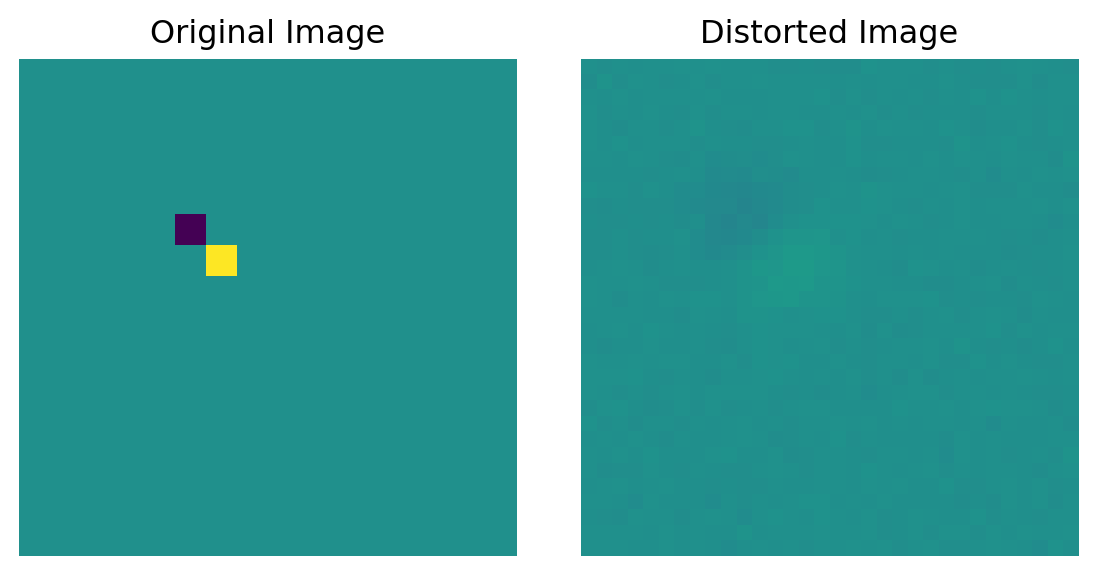

In [4]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(x[0, 0], cmap='viridis', vmin=-1, vmax=1)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)

b_noisy = b+ 0.01 * torch.randn_like(b)
plt.imshow(b_noisy[0, 0], cmap='viridis', vmin=-1, vmax=1)
plt.title('Distorted Image')
plt.axis('off')
plt.tight_layout()

In [5]:
from matplotlib import animation

b_flat = b.flatten().to(torch.float64)
x_flat = x.flatten().to(torch.float64)
b_noisy = b_flat + 0.001 * torch.randn_like(b_flat)

def get_xhat(t):
    Sinv_t = (1 - torch.exp(-S**2 * t)) / S
    A_pinv = V @ torch.diag(Sinv_t) @ U.T
    xhat = A_pinv @ b_noisy
    return xhat

# Time evolution parameters
num_frames = 50
t_vals = np.logspace(0, 6, num_frames)

# Prepare the plot
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(np.zeros((dim, dim)), cmap='viridis', vmin=-1, vmax=1)
ax.set_title('Time Evolution of Pseudo-Inverse Gradient Flow')
plt.axis('off')

# Initialize the error text
error_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color='blue', fontsize=12,
                     verticalalignment='top')

time_text = ax.text(0.5, 0.95, '', transform=ax.transAxes, color='blue', fontsize=12,
                        verticalalignment='top')

# Initialize containers to track min error and best time
tracking = {'min_error': float('inf'), 'best_t': 0.0}

# Animation update function
def update_frame(t):
    # Compute time-dependent singular values
    Sinv_t = (1 - torch.exp(-S ** 2 * t)) / S
    # Construct the pseudoinverse of Amat at time t
    A_pinv = V @ torch.diag(Sinv_t) @ U.t()
    # Reconstruct the image estimate x(t)
    xt = A_pinv @ b_noisy
    # Compute the relative error
    error = torch.norm(x_flat - xt) / torch.norm(x_flat)
    
    # Update min_error and best_t if current error is lower
    if error.item() < tracking['min_error']:
        tracking['min_error'] = error.item()
        tracking['best_t'] = t

    # Reshape to image dimensions
    x_image = xt.reshape(dim, dim).detach().numpy()

    # Update the image data
    im.set_data(x_image)

    # Update the error text
    error_text.set_text(f'Relative Error: {error.item():.4f}')
    time_text.set_text(f'Time: {t:.2f}')

    return [im, error_text, time_text]

# Create the animation
ani = animation.FuncAnimation(fig, update_frame, frames=t_vals, blit=True, interval=100)

ani.save('imgs/gradient_flow.gif', writer='pillow', fps=5)
plt.close(fig)

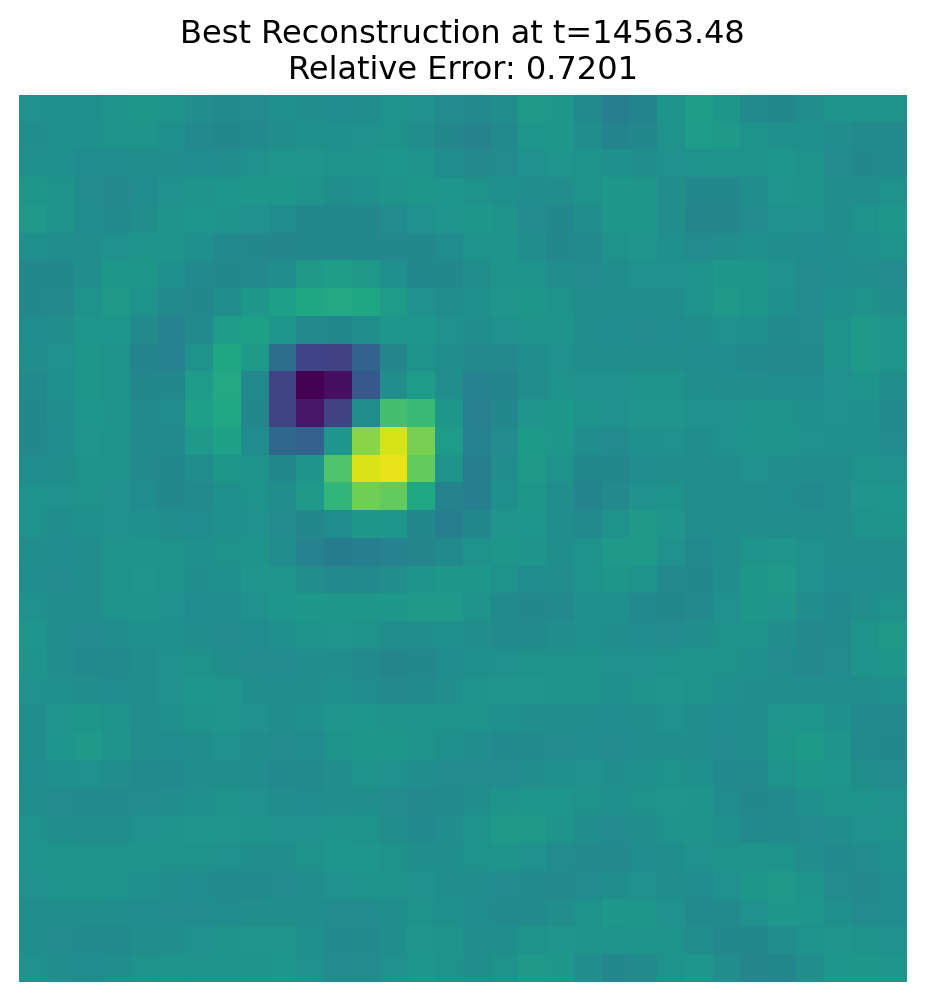

In [6]:
best_img = get_xhat(tracking['best_t']).reshape(dim, dim).detach().numpy()

plt.figure(figsize=(6, 6))
plt.imshow(best_img / np.max(np.abs(best_img)), cmap='viridis', vmin=-1, vmax=1)
plt.title(f'Best Reconstruction at t={tracking["best_t"]:.2f}\nRelative Error: {tracking["min_error"]:.4f}')
plt.axis('off')
plt.show()

In [7]:
def Amv_adjoint(v):
    x = torch.zeros(1, 1, dim, dim)
    x.requires_grad = True
    b = Amv(x)
    # Compute the dot product of the forward operator with the input vector
    h = torch.sum(b * v)
    # Compute the gradient of the dot product with respect to the input image
    adjoint = torch.autograd.grad(h, x, create_graph=True)[0]
    return adjoint

In [8]:
Amat_adj = torch.zeros(n,n)

dim = 32 # Same as earlier
k=0
for i in range(dim):
  for j in range(dim):
    e_ij = torch.zeros_like(x)
    e_ij[:,:, i, j] = 1.0
    y = Amv_adjoint(e_ij)
    Amat_adj[:, k] = y.flatten()
    k = k+1

diff = torch.norm(Amat_adj - Amat.T)
print(f'Norm of difference between adjoint and transpose: {diff:.2e}')

Norm of difference between adjoint and transpose: 4.43e-07


Least Squares Iteration:   0%|          | 0/1000 [00:00<?, ?iter/s]

Least Squares Iteration:   0%|          | 0/1000 [00:00<?, ?iter/s, Error=2.1227e-01]

Least Squares Iteration:   0%|          | 1/1000 [00:00<00:02, 333.41iter/s, Error=1.2275e-01]

Least Squares Iteration:   0%|          | 2/1000 [00:00<00:01, 499.83iter/s, Error=8.6669e-02]

Least Squares Iteration:   0%|          | 3/1000 [00:00<00:02, 428.56iter/s, Error=6.7169e-02]

Least Squares Iteration:   0%|          | 4/1000 [00:00<00:02, 444.43iter/s, Error=5.5200e-02]

Least Squares Iteration:   0%|          | 5/1000 [00:00<00:01, 500.12iter/s, Error=4.7147e-02]

Least Squares Iteration:   1%|          | 6/1000 [00:00<00:01, 500.02iter/s, Error=4.1317e-02]

Least Squares Iteration:   1%|          | 7/1000 [00:00<00:01, 499.99iter/s, Error=3.6870e-02]

Least Squares Iteration:   1%|          | 8/1000 [00:00<00:01, 500.01iter/s, Error=3.3355e-02]

Least Squares Iteration:   1%|          | 9/1000 [00:00<00:01, 529.35iter/s, Error=3.0509e-02]

Least Squares Iteration:   1%|          | 10/1000 [00:00<00:01, 526.33iter/s, Error=2.8164e-02]

Least Squares Iteration:   1%|          | 11/1000 [00:00<00:01, 550.01iter/s, Error=2.6202e-02]

Least Squares Iteration:   1%|          | 12/1000 [00:00<00:01, 545.52iter/s, Error=2.4539e-02]

Least Squares Iteration:   1%|▏         | 13/1000 [00:00<00:01, 565.29iter/s, Error=2.3111e-02]

Least Squares Iteration:   1%|▏         | 14/1000 [00:00<00:01, 559.96iter/s, Error=2.1871e-02]

Least Squares Iteration:   2%|▏         | 15/1000 [00:00<00:01, 576.91iter/s, Error=2.0782e-02]

Least Squares Iteration:   2%|▏         | 16/1000 [00:00<00:01, 571.37iter/s, Error=1.9816e-02]

Least Squares Iteration:   2%|▏         | 17/1000 [00:00<00:01, 566.68iter/s, Error=1.8949e-02]

Least Squares Iteration:   2%|▏         | 18/1000 [00:00<00:01, 580.70iter/s, Error=1.8166e-02]

Least Squares Iteration:   2%|▏         | 19/1000 [00:00<00:01, 575.77iter/s, Error=1.7453e-02]

Least Squares Iteration:   2%|▏         | 20/1000 [00:00<00:01, 571.44iter/s, Error=1.6800e-02]

Least Squares Iteration:   2%|▏         | 21/1000 [00:00<00:01, 583.38iter/s, Error=1.6197e-02]

Least Squares Iteration:   2%|▏         | 22/1000 [00:00<00:01, 579.01iter/s, Error=1.5639e-02]

Least Squares Iteration:   2%|▏         | 23/1000 [00:00<00:01, 589.80iter/s, Error=1.5119e-02]

Least Squares Iteration:   2%|▏         | 24/1000 [00:00<00:01, 600.01iter/s, Error=1.4634e-02]

Least Squares Iteration:   2%|▎         | 25/1000 [00:00<00:01, 595.25iter/s, Error=1.4180e-02]

Least Squares Iteration:   3%|▎         | 26/1000 [00:00<00:01, 604.68iter/s, Error=1.3753e-02]

Least Squares Iteration:   3%|▎         | 27/1000 [00:00<00:01, 613.66iter/s, Error=1.3351e-02]

Least Squares Iteration:   3%|▎         | 28/1000 [00:00<00:01, 622.25iter/s, Error=1.2972e-02]

Least Squares Iteration:   3%|▎         | 29/1000 [00:00<00:01, 630.47iter/s, Error=1.2613e-02]

Least Squares Iteration:   3%|▎         | 30/1000 [00:00<00:01, 625.01iter/s, Error=1.2274e-02]

Least Squares Iteration:   3%|▎         | 31/1000 [00:00<00:01, 632.70iter/s, Error=1.1952e-02]

Least Squares Iteration:   3%|▎         | 32/1000 [00:00<00:01, 627.47iter/s, Error=1.1647e-02]

Least Squares Iteration:   3%|▎         | 33/1000 [00:00<00:01, 634.65iter/s, Error=1.1357e-02]

Least Squares Iteration:   3%|▎         | 34/1000 [00:00<00:01, 641.55iter/s, Error=1.1082e-02]

Least Squares Iteration:   4%|▎         | 35/1000 [00:00<00:01, 636.38iter/s, Error=1.0820e-02]

Least Squares Iteration:   4%|▎         | 36/1000 [00:00<00:01, 642.87iter/s, Error=1.0570e-02]

Least Squares Iteration:   4%|▎         | 37/1000 [00:00<00:01, 637.94iter/s, Error=1.0332e-02]

Least Squares Iteration:   4%|▍         | 38/1000 [00:00<00:01, 644.08iter/s, Error=1.0105e-02]

Least Squares Iteration:   4%|▍         | 39/1000 [00:00<00:01, 639.36iter/s, Error=9.8878e-03]

Least Squares Iteration:   4%|▍         | 40/1000 [00:00<00:01, 645.11iter/s, Error=9.6808e-03]

Least Squares Iteration:   4%|▍         | 41/1000 [00:00<00:01, 640.60iter/s, Error=9.4830e-03]

Least Squares Iteration:   4%|▍         | 42/1000 [00:00<00:01, 646.11iter/s, Error=9.2939e-03]

Least Squares Iteration:   4%|▍         | 43/1000 [00:00<00:01, 641.73iter/s, Error=9.1131e-03]

Least Squares Iteration:   4%|▍         | 44/1000 [00:00<00:01, 647.02iter/s, Error=8.9400e-03]

Least Squares Iteration:   4%|▍         | 45/1000 [00:00<00:01, 642.82iter/s, Error=8.7742e-03]

Least Squares Iteration:   5%|▍         | 46/1000 [00:00<00:01, 647.87iter/s, Error=8.6154e-03]

Least Squares Iteration:   5%|▍         | 47/1000 [00:00<00:01, 643.81iter/s, Error=8.4632e-03]

Least Squares Iteration:   5%|▍         | 48/1000 [00:00<00:01, 648.64iter/s, Error=8.3172e-03]

Least Squares Iteration:   5%|▍         | 49/1000 [00:00<00:01, 653.30iter/s, Error=8.1772e-03]

Least Squares Iteration:   5%|▌         | 50/1000 [00:00<00:01, 653.50iter/s, Error=8.0428e-03]

Least Squares Iteration:   5%|▌         | 51/1000 [00:00<00:01, 649.56iter/s, Error=7.9137e-03]

Least Squares Iteration:   5%|▌         | 52/1000 [00:00<00:01, 653.96iter/s, Error=7.7897e-03]

Least Squares Iteration:   5%|▌         | 53/1000 [00:00<00:01, 658.26iter/s, Error=7.6705e-03]

Least Squares Iteration:   5%|▌         | 54/1000 [00:00<00:01, 654.41iter/s, Error=7.5558e-03]

Least Squares Iteration:   6%|▌         | 55/1000 [00:00<00:01, 658.56iter/s, Error=7.4455e-03]

Least Squares Iteration:   6%|▌         | 56/1000 [00:00<00:01, 654.85iter/s, Error=7.3393e-03]

Least Squares Iteration:   6%|▌         | 57/1000 [00:00<00:01, 658.82iter/s, Error=7.2371e-03]

Least Squares Iteration:   6%|▌         | 58/1000 [00:00<00:01, 655.24iter/s, Error=7.1385e-03]

Least Squares Iteration:   6%|▌         | 59/1000 [00:00<00:01, 659.09iter/s, Error=7.0435e-03]

Least Squares Iteration:   6%|▌         | 60/1000 [00:00<00:01, 655.61iter/s, Error=6.9519e-03]

Least Squares Iteration:   6%|▌         | 61/1000 [00:00<00:01, 652.29iter/s, Error=6.8634e-03]

Least Squares Iteration:   6%|▌         | 62/1000 [00:00<00:01, 655.97iter/s, Error=6.7781e-03]

Least Squares Iteration:   6%|▋         | 63/1000 [00:00<00:01, 652.74iter/s, Error=6.6956e-03]

Least Squares Iteration:   6%|▋         | 64/1000 [00:00<00:01, 656.30iter/s, Error=6.6158e-03]

Least Squares Iteration:   6%|▋         | 65/1000 [00:00<00:01, 653.16iter/s, Error=6.5387e-03]

Least Squares Iteration:   7%|▋         | 66/1000 [00:00<00:01, 656.61iter/s, Error=6.4641e-03]

Least Squares Iteration:   7%|▋         | 67/1000 [00:00<00:01, 666.56iter/s, Error=6.4641e-03]

Least Squares Iteration:   7%|▋         | 67/1000 [00:00<00:01, 666.56iter/s, Error=6.3919e-03]

Least Squares Iteration:   7%|▋         | 68/1000 [00:00<00:01, 666.56iter/s, Error=6.3220e-03]

Least Squares Iteration:   7%|▋         | 69/1000 [00:00<00:01, 666.56iter/s, Error=6.2542e-03]

Least Squares Iteration:   7%|▋         | 70/1000 [00:00<00:01, 666.56iter/s, Error=6.1885e-03]

Least Squares Iteration:   7%|▋         | 71/1000 [00:00<00:01, 666.56iter/s, Error=6.1247e-03]

Least Squares Iteration:   7%|▋         | 72/1000 [00:00<00:01, 666.56iter/s, Error=6.0628e-03]

Least Squares Iteration:   7%|▋         | 73/1000 [00:00<00:01, 666.56iter/s, Error=6.0028e-03]

Least Squares Iteration:   7%|▋         | 74/1000 [00:00<00:01, 666.56iter/s, Error=5.9444e-03]

Least Squares Iteration:   8%|▊         | 75/1000 [00:00<00:01, 666.56iter/s, Error=5.8876e-03]

Least Squares Iteration:   8%|▊         | 76/1000 [00:00<00:01, 666.56iter/s, Error=5.8325e-03]

Least Squares Iteration:   8%|▊         | 77/1000 [00:00<00:01, 666.56iter/s, Error=5.7788e-03]

Least Squares Iteration:   8%|▊         | 78/1000 [00:00<00:01, 666.56iter/s, Error=5.7265e-03]

Least Squares Iteration:   8%|▊         | 79/1000 [00:00<00:01, 666.56iter/s, Error=5.6756e-03]

Least Squares Iteration:   8%|▊         | 80/1000 [00:00<00:01, 666.56iter/s, Error=5.6260e-03]

Least Squares Iteration:   8%|▊         | 81/1000 [00:00<00:01, 666.56iter/s, Error=5.5776e-03]

Least Squares Iteration:   8%|▊         | 82/1000 [00:00<00:01, 666.56iter/s, Error=5.5304e-03]

Least Squares Iteration:   8%|▊         | 83/1000 [00:00<00:01, 666.56iter/s, Error=5.4844e-03]

Least Squares Iteration:   8%|▊         | 84/1000 [00:00<00:01, 666.56iter/s, Error=5.4394e-03]

Least Squares Iteration:   8%|▊         | 85/1000 [00:00<00:01, 666.56iter/s, Error=5.3955e-03]

Least Squares Iteration:   9%|▊         | 86/1000 [00:00<00:01, 666.56iter/s, Error=5.3526e-03]

Least Squares Iteration:   9%|▊         | 87/1000 [00:00<00:01, 666.56iter/s, Error=5.3107e-03]

Least Squares Iteration:   9%|▉         | 88/1000 [00:00<00:01, 666.56iter/s, Error=5.2696e-03]

Least Squares Iteration:   9%|▉         | 89/1000 [00:00<00:01, 666.56iter/s, Error=5.2295e-03]

Least Squares Iteration:   9%|▉         | 90/1000 [00:00<00:01, 666.56iter/s, Error=5.1902e-03]

Least Squares Iteration:   9%|▉         | 91/1000 [00:00<00:01, 666.56iter/s, Error=5.1518e-03]

Least Squares Iteration:   9%|▉         | 92/1000 [00:00<00:01, 666.56iter/s, Error=5.1141e-03]

Least Squares Iteration:   9%|▉         | 93/1000 [00:00<00:01, 666.56iter/s, Error=5.0772e-03]

Least Squares Iteration:   9%|▉         | 94/1000 [00:00<00:01, 666.56iter/s, Error=5.0410e-03]

Least Squares Iteration:  10%|▉         | 95/1000 [00:00<00:01, 666.56iter/s, Error=5.0055e-03]

Least Squares Iteration:  10%|▉         | 96/1000 [00:00<00:01, 666.56iter/s, Error=4.9707e-03]

Least Squares Iteration:  10%|▉         | 97/1000 [00:00<00:01, 666.56iter/s, Error=4.9365e-03]

Least Squares Iteration:  10%|▉         | 98/1000 [00:00<00:01, 666.56iter/s, Error=4.9030e-03]

Least Squares Iteration:  10%|▉         | 99/1000 [00:00<00:01, 666.56iter/s, Error=4.8700e-03]

Least Squares Iteration:  10%|█         | 100/1000 [00:00<00:01, 666.56iter/s, Error=4.8377e-03]

Least Squares Iteration:  10%|█         | 101/1000 [00:00<00:01, 666.56iter/s, Error=4.8059e-03]

Least Squares Iteration:  10%|█         | 102/1000 [00:00<00:01, 666.56iter/s, Error=4.7746e-03]

Least Squares Iteration:  10%|█         | 103/1000 [00:00<00:01, 666.56iter/s, Error=4.7439e-03]

Least Squares Iteration:  10%|█         | 104/1000 [00:00<00:01, 666.56iter/s, Error=4.7137e-03]

Least Squares Iteration:  10%|█         | 105/1000 [00:00<00:01, 666.56iter/s, Error=4.6839e-03]

Least Squares Iteration:  11%|█         | 106/1000 [00:00<00:01, 666.56iter/s, Error=4.6547e-03]

Least Squares Iteration:  11%|█         | 107/1000 [00:00<00:01, 666.56iter/s, Error=4.6259e-03]

Least Squares Iteration:  11%|█         | 108/1000 [00:00<00:01, 666.56iter/s, Error=4.5975e-03]

Least Squares Iteration:  11%|█         | 109/1000 [00:00<00:01, 666.56iter/s, Error=4.5696e-03]

Least Squares Iteration:  11%|█         | 110/1000 [00:00<00:01, 666.56iter/s, Error=4.5421e-03]

Least Squares Iteration:  11%|█         | 111/1000 [00:00<00:01, 666.56iter/s, Error=4.5150e-03]

Least Squares Iteration:  11%|█         | 112/1000 [00:00<00:01, 666.56iter/s, Error=4.4883e-03]

Least Squares Iteration:  11%|█▏        | 113/1000 [00:00<00:01, 666.56iter/s, Error=4.4620e-03]

Least Squares Iteration:  11%|█▏        | 114/1000 [00:00<00:01, 666.56iter/s, Error=4.4361e-03]

Least Squares Iteration:  12%|█▏        | 115/1000 [00:00<00:01, 666.56iter/s, Error=4.4105e-03]

Least Squares Iteration:  12%|█▏        | 116/1000 [00:00<00:01, 666.56iter/s, Error=4.3852e-03]

Least Squares Iteration:  12%|█▏        | 117/1000 [00:00<00:01, 666.56iter/s, Error=4.3603e-03]

Least Squares Iteration:  12%|█▏        | 118/1000 [00:00<00:01, 666.56iter/s, Error=4.3358e-03]

Least Squares Iteration:  12%|█▏        | 119/1000 [00:00<00:01, 666.56iter/s, Error=4.3116e-03]

Least Squares Iteration:  12%|█▏        | 120/1000 [00:00<00:01, 666.56iter/s, Error=4.2876e-03]

Least Squares Iteration:  12%|█▏        | 121/1000 [00:00<00:01, 666.56iter/s, Error=4.2640e-03]

Least Squares Iteration:  12%|█▏        | 122/1000 [00:00<00:01, 666.56iter/s, Error=4.2407e-03]

Least Squares Iteration:  12%|█▏        | 123/1000 [00:00<00:01, 666.56iter/s, Error=4.2177e-03]

Least Squares Iteration:  12%|█▏        | 124/1000 [00:00<00:01, 666.56iter/s, Error=4.1949e-03]

Least Squares Iteration:  12%|█▎        | 125/1000 [00:00<00:01, 666.56iter/s, Error=4.1725e-03]

Least Squares Iteration:  13%|█▎        | 126/1000 [00:00<00:01, 666.56iter/s, Error=4.1503e-03]

Least Squares Iteration:  13%|█▎        | 127/1000 [00:00<00:01, 666.56iter/s, Error=4.1284e-03]

Least Squares Iteration:  13%|█▎        | 128/1000 [00:00<00:01, 666.56iter/s, Error=4.1067e-03]

Least Squares Iteration:  13%|█▎        | 129/1000 [00:00<00:01, 666.56iter/s, Error=4.0853e-03]

Least Squares Iteration:  13%|█▎        | 130/1000 [00:00<00:01, 666.56iter/s, Error=4.0641e-03]

Least Squares Iteration:  13%|█▎        | 131/1000 [00:00<00:01, 666.56iter/s, Error=4.0432e-03]

Least Squares Iteration:  13%|█▎        | 132/1000 [00:00<00:01, 666.56iter/s, Error=4.0225e-03]

Least Squares Iteration:  13%|█▎        | 133/1000 [00:00<00:01, 666.56iter/s, Error=4.0021e-03]

Least Squares Iteration:  13%|█▎        | 134/1000 [00:00<00:01, 602.95iter/s, Error=4.0021e-03]

Least Squares Iteration:  13%|█▎        | 134/1000 [00:00<00:01, 602.95iter/s, Error=3.9818e-03]

Least Squares Iteration:  14%|█▎        | 135/1000 [00:00<00:01, 602.95iter/s, Error=3.9618e-03]

Least Squares Iteration:  14%|█▎        | 136/1000 [00:00<00:01, 602.95iter/s, Error=3.9420e-03]

Least Squares Iteration:  14%|█▎        | 137/1000 [00:00<00:01, 602.95iter/s, Error=3.9225e-03]

Least Squares Iteration:  14%|█▍        | 138/1000 [00:00<00:01, 602.95iter/s, Error=3.9031e-03]

Least Squares Iteration:  14%|█▍        | 139/1000 [00:00<00:01, 602.95iter/s, Error=3.8839e-03]

Least Squares Iteration:  14%|█▍        | 140/1000 [00:00<00:01, 602.95iter/s, Error=3.8650e-03]

Least Squares Iteration:  14%|█▍        | 141/1000 [00:00<00:01, 602.95iter/s, Error=3.8462e-03]

Least Squares Iteration:  14%|█▍        | 142/1000 [00:00<00:01, 602.95iter/s, Error=3.8277e-03]

Least Squares Iteration:  14%|█▍        | 143/1000 [00:00<00:01, 602.95iter/s, Error=3.8093e-03]

Least Squares Iteration:  14%|█▍        | 144/1000 [00:00<00:01, 602.95iter/s, Error=3.7911e-03]

Least Squares Iteration:  14%|█▍        | 145/1000 [00:00<00:01, 602.95iter/s, Error=3.7731e-03]

Least Squares Iteration:  15%|█▍        | 146/1000 [00:00<00:01, 602.95iter/s, Error=3.7553e-03]

Least Squares Iteration:  15%|█▍        | 147/1000 [00:00<00:01, 602.95iter/s, Error=3.7376e-03]

Least Squares Iteration:  15%|█▍        | 148/1000 [00:00<00:01, 602.95iter/s, Error=3.7202e-03]

Least Squares Iteration:  15%|█▍        | 149/1000 [00:00<00:01, 602.95iter/s, Error=3.7028e-03]

Least Squares Iteration:  15%|█▌        | 150/1000 [00:00<00:01, 602.95iter/s, Error=3.6857e-03]

Least Squares Iteration:  15%|█▌        | 151/1000 [00:00<00:01, 602.95iter/s, Error=3.6687e-03]

Least Squares Iteration:  15%|█▌        | 152/1000 [00:00<00:01, 602.95iter/s, Error=3.6519e-03]

Least Squares Iteration:  15%|█▌        | 153/1000 [00:00<00:01, 602.95iter/s, Error=3.6353e-03]

Least Squares Iteration:  15%|█▌        | 154/1000 [00:00<00:01, 602.95iter/s, Error=3.6188e-03]

Least Squares Iteration:  16%|█▌        | 155/1000 [00:00<00:01, 602.95iter/s, Error=3.6025e-03]

Least Squares Iteration:  16%|█▌        | 156/1000 [00:00<00:01, 602.95iter/s, Error=3.5863e-03]

Least Squares Iteration:  16%|█▌        | 157/1000 [00:00<00:01, 602.95iter/s, Error=3.5703e-03]

Least Squares Iteration:  16%|█▌        | 158/1000 [00:00<00:01, 602.95iter/s, Error=3.5544e-03]

Least Squares Iteration:  16%|█▌        | 159/1000 [00:00<00:01, 602.95iter/s, Error=3.5387e-03]

Least Squares Iteration:  16%|█▌        | 160/1000 [00:00<00:01, 602.95iter/s, Error=3.5231e-03]

Least Squares Iteration:  16%|█▌        | 161/1000 [00:00<00:01, 602.95iter/s, Error=3.5076e-03]

Least Squares Iteration:  16%|█▌        | 162/1000 [00:00<00:01, 602.95iter/s, Error=3.4923e-03]

Least Squares Iteration:  16%|█▋        | 163/1000 [00:00<00:01, 602.95iter/s, Error=3.4772e-03]

Least Squares Iteration:  16%|█▋        | 164/1000 [00:00<00:01, 602.95iter/s, Error=3.4621e-03]

Least Squares Iteration:  16%|█▋        | 165/1000 [00:00<00:01, 602.95iter/s, Error=3.4472e-03]

Least Squares Iteration:  17%|█▋        | 166/1000 [00:00<00:01, 602.95iter/s, Error=3.4325e-03]

Least Squares Iteration:  17%|█▋        | 167/1000 [00:00<00:01, 602.95iter/s, Error=3.4179e-03]

Least Squares Iteration:  17%|█▋        | 168/1000 [00:00<00:01, 602.95iter/s, Error=3.4034e-03]

Least Squares Iteration:  17%|█▋        | 169/1000 [00:00<00:01, 602.95iter/s, Error=3.3890e-03]

Least Squares Iteration:  17%|█▋        | 170/1000 [00:00<00:01, 602.95iter/s, Error=3.3747e-03]

Least Squares Iteration:  17%|█▋        | 171/1000 [00:00<00:01, 602.95iter/s, Error=3.3606e-03]

Least Squares Iteration:  17%|█▋        | 172/1000 [00:00<00:01, 602.95iter/s, Error=3.3466e-03]

Least Squares Iteration:  17%|█▋        | 173/1000 [00:00<00:01, 602.95iter/s, Error=3.3327e-03]

Least Squares Iteration:  17%|█▋        | 174/1000 [00:00<00:01, 602.95iter/s, Error=3.3190e-03]

Least Squares Iteration:  18%|█▊        | 175/1000 [00:00<00:01, 602.95iter/s, Error=3.3053e-03]

Least Squares Iteration:  18%|█▊        | 176/1000 [00:00<00:01, 602.95iter/s, Error=3.2918e-03]

Least Squares Iteration:  18%|█▊        | 177/1000 [00:00<00:01, 602.95iter/s, Error=3.2784e-03]

Least Squares Iteration:  18%|█▊        | 178/1000 [00:00<00:01, 602.95iter/s, Error=3.2651e-03]

Least Squares Iteration:  18%|█▊        | 179/1000 [00:00<00:01, 602.95iter/s, Error=3.2519e-03]

Least Squares Iteration:  18%|█▊        | 180/1000 [00:00<00:01, 602.95iter/s, Error=3.2388e-03]

Least Squares Iteration:  18%|█▊        | 181/1000 [00:00<00:01, 602.95iter/s, Error=3.2259e-03]

Least Squares Iteration:  18%|█▊        | 182/1000 [00:00<00:01, 602.95iter/s, Error=3.2130e-03]

Least Squares Iteration:  18%|█▊        | 183/1000 [00:00<00:01, 602.95iter/s, Error=3.2003e-03]

Least Squares Iteration:  18%|█▊        | 184/1000 [00:00<00:01, 602.95iter/s, Error=3.1876e-03]

Least Squares Iteration:  18%|█▊        | 185/1000 [00:00<00:01, 602.95iter/s, Error=3.1751e-03]

Least Squares Iteration:  19%|█▊        | 186/1000 [00:00<00:01, 602.95iter/s, Error=3.1626e-03]

Least Squares Iteration:  19%|█▊        | 187/1000 [00:00<00:01, 602.95iter/s, Error=3.1503e-03]

Least Squares Iteration:  19%|█▉        | 188/1000 [00:00<00:01, 602.95iter/s, Error=3.1381e-03]

Least Squares Iteration:  19%|█▉        | 189/1000 [00:00<00:01, 602.95iter/s, Error=3.1259e-03]

Least Squares Iteration:  19%|█▉        | 190/1000 [00:00<00:01, 602.95iter/s, Error=3.1139e-03]

Least Squares Iteration:  19%|█▉        | 191/1000 [00:00<00:01, 602.95iter/s, Error=3.1020e-03]

Least Squares Iteration:  19%|█▉        | 192/1000 [00:00<00:01, 602.95iter/s, Error=3.0901e-03]

Least Squares Iteration:  19%|█▉        | 193/1000 [00:00<00:01, 602.95iter/s, Error=3.0784e-03]

Least Squares Iteration:  19%|█▉        | 194/1000 [00:00<00:01, 602.95iter/s, Error=3.0667e-03]

Least Squares Iteration:  20%|█▉        | 195/1000 [00:00<00:01, 527.56iter/s, Error=3.0667e-03]

Least Squares Iteration:  20%|█▉        | 195/1000 [00:00<00:01, 527.56iter/s, Error=3.0552e-03]

Least Squares Iteration:  20%|█▉        | 196/1000 [00:00<00:01, 527.56iter/s, Error=3.0437e-03]

Least Squares Iteration:  20%|█▉        | 197/1000 [00:00<00:01, 527.56iter/s, Error=3.0324e-03]

Least Squares Iteration:  20%|█▉        | 198/1000 [00:00<00:01, 527.56iter/s, Error=3.0211e-03]

Least Squares Iteration:  20%|█▉        | 199/1000 [00:00<00:01, 527.56iter/s, Error=3.0099e-03]

Least Squares Iteration:  20%|██        | 200/1000 [00:00<00:01, 527.56iter/s, Error=2.9988e-03]

Least Squares Iteration:  20%|██        | 201/1000 [00:00<00:01, 527.56iter/s, Error=2.9878e-03]

Least Squares Iteration:  20%|██        | 202/1000 [00:00<00:01, 527.56iter/s, Error=2.9768e-03]

Least Squares Iteration:  20%|██        | 203/1000 [00:00<00:01, 527.56iter/s, Error=2.9660e-03]

Least Squares Iteration:  20%|██        | 204/1000 [00:00<00:01, 527.56iter/s, Error=2.9553e-03]

Least Squares Iteration:  20%|██        | 205/1000 [00:00<00:01, 527.56iter/s, Error=2.9446e-03]

Least Squares Iteration:  21%|██        | 206/1000 [00:00<00:01, 527.56iter/s, Error=2.9340e-03]

Least Squares Iteration:  21%|██        | 207/1000 [00:00<00:01, 527.56iter/s, Error=2.9235e-03]

Least Squares Iteration:  21%|██        | 208/1000 [00:00<00:01, 527.56iter/s, Error=2.9131e-03]

Least Squares Iteration:  21%|██        | 209/1000 [00:00<00:01, 527.56iter/s, Error=2.9027e-03]

Least Squares Iteration:  21%|██        | 210/1000 [00:00<00:01, 527.56iter/s, Error=2.8925e-03]

Least Squares Iteration:  21%|██        | 211/1000 [00:00<00:01, 527.56iter/s, Error=2.8823e-03]

Least Squares Iteration:  21%|██        | 212/1000 [00:00<00:01, 527.56iter/s, Error=2.8722e-03]

Least Squares Iteration:  21%|██▏       | 213/1000 [00:00<00:01, 527.56iter/s, Error=2.8622e-03]

Least Squares Iteration:  21%|██▏       | 214/1000 [00:00<00:01, 527.56iter/s, Error=2.8522e-03]

Least Squares Iteration:  22%|██▏       | 215/1000 [00:00<00:01, 527.56iter/s, Error=2.8423e-03]

Least Squares Iteration:  22%|██▏       | 216/1000 [00:00<00:01, 527.56iter/s, Error=2.8325e-03]

Least Squares Iteration:  22%|██▏       | 217/1000 [00:00<00:01, 527.56iter/s, Error=2.8228e-03]

Least Squares Iteration:  22%|██▏       | 218/1000 [00:00<00:01, 527.56iter/s, Error=2.8132e-03]

Least Squares Iteration:  22%|██▏       | 219/1000 [00:00<00:01, 527.56iter/s, Error=2.8036e-03]

Least Squares Iteration:  22%|██▏       | 220/1000 [00:00<00:01, 527.56iter/s, Error=2.7941e-03]

Least Squares Iteration:  22%|██▏       | 221/1000 [00:00<00:01, 527.56iter/s, Error=2.7847e-03]

Least Squares Iteration:  22%|██▏       | 222/1000 [00:00<00:01, 527.56iter/s, Error=2.7753e-03]

Least Squares Iteration:  22%|██▏       | 223/1000 [00:00<00:01, 527.56iter/s, Error=2.7660e-03]

Least Squares Iteration:  22%|██▏       | 224/1000 [00:00<00:01, 527.56iter/s, Error=2.7568e-03]

Least Squares Iteration:  22%|██▎       | 225/1000 [00:00<00:01, 527.56iter/s, Error=2.7477e-03]

Least Squares Iteration:  23%|██▎       | 226/1000 [00:00<00:01, 527.56iter/s, Error=2.7386e-03]

Least Squares Iteration:  23%|██▎       | 227/1000 [00:00<00:01, 527.56iter/s, Error=2.7296e-03]

Least Squares Iteration:  23%|██▎       | 228/1000 [00:00<00:01, 527.56iter/s, Error=2.7206e-03]

Least Squares Iteration:  23%|██▎       | 229/1000 [00:00<00:01, 527.56iter/s, Error=2.7117e-03]

Least Squares Iteration:  23%|██▎       | 230/1000 [00:00<00:01, 527.56iter/s, Error=2.7029e-03]

Least Squares Iteration:  23%|██▎       | 231/1000 [00:00<00:01, 527.56iter/s, Error=2.6942e-03]

Least Squares Iteration:  23%|██▎       | 232/1000 [00:00<00:01, 527.56iter/s, Error=2.6855e-03]

Least Squares Iteration:  23%|██▎       | 233/1000 [00:00<00:01, 527.56iter/s, Error=2.6769e-03]

Least Squares Iteration:  23%|██▎       | 234/1000 [00:00<00:01, 527.56iter/s, Error=2.6683e-03]

Least Squares Iteration:  24%|██▎       | 235/1000 [00:00<00:01, 527.56iter/s, Error=2.6598e-03]

Least Squares Iteration:  24%|██▎       | 236/1000 [00:00<00:01, 527.56iter/s, Error=2.6514e-03]

Least Squares Iteration:  24%|██▎       | 237/1000 [00:00<00:01, 527.56iter/s, Error=2.6430e-03]

Least Squares Iteration:  24%|██▍       | 238/1000 [00:00<00:01, 527.56iter/s, Error=2.6347e-03]

Least Squares Iteration:  24%|██▍       | 239/1000 [00:00<00:01, 527.56iter/s, Error=2.6265e-03]

Least Squares Iteration:  24%|██▍       | 240/1000 [00:00<00:01, 527.56iter/s, Error=2.6183e-03]

Least Squares Iteration:  24%|██▍       | 241/1000 [00:00<00:01, 527.56iter/s, Error=2.6101e-03]

Least Squares Iteration:  24%|██▍       | 242/1000 [00:00<00:01, 527.56iter/s, Error=2.6021e-03]

Least Squares Iteration:  24%|██▍       | 243/1000 [00:00<00:01, 527.56iter/s, Error=2.5941e-03]

Least Squares Iteration:  24%|██▍       | 244/1000 [00:00<00:01, 527.56iter/s, Error=2.5861e-03]

Least Squares Iteration:  24%|██▍       | 245/1000 [00:00<00:01, 527.56iter/s, Error=2.5782e-03]

Least Squares Iteration:  25%|██▍       | 246/1000 [00:00<00:01, 527.56iter/s, Error=2.5704e-03]

Least Squares Iteration:  25%|██▍       | 247/1000 [00:00<00:01, 527.56iter/s, Error=2.5626e-03]

Least Squares Iteration:  25%|██▍       | 248/1000 [00:00<00:01, 527.56iter/s, Error=2.5549e-03]

Least Squares Iteration:  25%|██▍       | 249/1000 [00:00<00:01, 451.51iter/s, Error=2.5549e-03]

Least Squares Iteration:  25%|██▍       | 249/1000 [00:00<00:01, 451.51iter/s, Error=2.5472e-03]

Least Squares Iteration:  25%|██▌       | 250/1000 [00:00<00:01, 451.51iter/s, Error=2.5396e-03]

Least Squares Iteration:  25%|██▌       | 251/1000 [00:00<00:01, 451.51iter/s, Error=2.5320e-03]

Least Squares Iteration:  25%|██▌       | 252/1000 [00:00<00:01, 451.51iter/s, Error=2.5245e-03]

Least Squares Iteration:  25%|██▌       | 253/1000 [00:00<00:01, 451.51iter/s, Error=2.5170e-03]

Least Squares Iteration:  25%|██▌       | 254/1000 [00:00<00:01, 451.51iter/s, Error=2.5096e-03]

Least Squares Iteration:  26%|██▌       | 255/1000 [00:00<00:01, 451.51iter/s, Error=2.5023e-03]

Least Squares Iteration:  26%|██▌       | 256/1000 [00:00<00:01, 451.51iter/s, Error=2.4950e-03]

Least Squares Iteration:  26%|██▌       | 257/1000 [00:00<00:01, 451.51iter/s, Error=2.4877e-03]

Least Squares Iteration:  26%|██▌       | 258/1000 [00:00<00:01, 451.51iter/s, Error=2.4805e-03]

Least Squares Iteration:  26%|██▌       | 259/1000 [00:00<00:01, 451.51iter/s, Error=2.4734e-03]

Least Squares Iteration:  26%|██▌       | 260/1000 [00:00<00:01, 451.51iter/s, Error=2.4663e-03]

Least Squares Iteration:  26%|██▌       | 261/1000 [00:00<00:01, 451.51iter/s, Error=2.4592e-03]

Least Squares Iteration:  26%|██▌       | 262/1000 [00:00<00:01, 451.51iter/s, Error=2.4522e-03]

Least Squares Iteration:  26%|██▋       | 263/1000 [00:00<00:01, 451.51iter/s, Error=2.4453e-03]

Least Squares Iteration:  26%|██▋       | 264/1000 [00:00<00:01, 451.51iter/s, Error=2.4384e-03]

Least Squares Iteration:  26%|██▋       | 265/1000 [00:00<00:01, 451.51iter/s, Error=2.4315e-03]

Least Squares Iteration:  27%|██▋       | 266/1000 [00:00<00:01, 451.51iter/s, Error=2.4247e-03]

Least Squares Iteration:  27%|██▋       | 267/1000 [00:00<00:01, 451.51iter/s, Error=2.4179e-03]

Least Squares Iteration:  27%|██▋       | 268/1000 [00:00<00:01, 451.51iter/s, Error=2.4112e-03]

Least Squares Iteration:  27%|██▋       | 269/1000 [00:00<00:01, 451.51iter/s, Error=2.4046e-03]

Least Squares Iteration:  27%|██▋       | 270/1000 [00:00<00:01, 451.51iter/s, Error=2.3979e-03]

Least Squares Iteration:  27%|██▋       | 271/1000 [00:00<00:01, 451.51iter/s, Error=2.3913e-03]

Least Squares Iteration:  27%|██▋       | 272/1000 [00:00<00:01, 451.51iter/s, Error=2.3848e-03]

Least Squares Iteration:  27%|██▋       | 273/1000 [00:00<00:01, 451.51iter/s, Error=2.3783e-03]

Least Squares Iteration:  27%|██▋       | 274/1000 [00:00<00:01, 451.51iter/s, Error=2.3719e-03]

Least Squares Iteration:  28%|██▊       | 275/1000 [00:00<00:01, 451.51iter/s, Error=2.3655e-03]

Least Squares Iteration:  28%|██▊       | 276/1000 [00:00<00:01, 451.51iter/s, Error=2.3591e-03]

Least Squares Iteration:  28%|██▊       | 277/1000 [00:00<00:01, 451.51iter/s, Error=2.3528e-03]

Least Squares Iteration:  28%|██▊       | 278/1000 [00:00<00:01, 451.51iter/s, Error=2.3465e-03]

Least Squares Iteration:  28%|██▊       | 279/1000 [00:00<00:01, 451.51iter/s, Error=2.3403e-03]

Least Squares Iteration:  28%|██▊       | 280/1000 [00:00<00:01, 451.51iter/s, Error=2.3341e-03]

Least Squares Iteration:  28%|██▊       | 281/1000 [00:00<00:01, 451.51iter/s, Error=2.3279e-03]

Least Squares Iteration:  28%|██▊       | 282/1000 [00:00<00:01, 451.51iter/s, Error=2.3218e-03]

Least Squares Iteration:  28%|██▊       | 283/1000 [00:00<00:01, 451.51iter/s, Error=2.3157e-03]

Least Squares Iteration:  28%|██▊       | 284/1000 [00:00<00:01, 451.51iter/s, Error=2.3097e-03]

Least Squares Iteration:  28%|██▊       | 285/1000 [00:00<00:01, 451.51iter/s, Error=2.3037e-03]

Least Squares Iteration:  29%|██▊       | 286/1000 [00:00<00:01, 451.51iter/s, Error=2.2978e-03]

Least Squares Iteration:  29%|██▊       | 287/1000 [00:00<00:01, 451.51iter/s, Error=2.2919e-03]

Least Squares Iteration:  29%|██▉       | 288/1000 [00:00<00:01, 451.51iter/s, Error=2.2860e-03]

Least Squares Iteration:  29%|██▉       | 289/1000 [00:00<00:01, 451.51iter/s, Error=2.2802e-03]

Least Squares Iteration:  29%|██▉       | 290/1000 [00:00<00:01, 451.51iter/s, Error=2.2744e-03]

Least Squares Iteration:  29%|██▉       | 291/1000 [00:00<00:01, 451.51iter/s, Error=2.2686e-03]

Least Squares Iteration:  29%|██▉       | 292/1000 [00:00<00:01, 451.51iter/s, Error=2.2629e-03]

Least Squares Iteration:  29%|██▉       | 293/1000 [00:00<00:01, 451.51iter/s, Error=2.2572e-03]

Least Squares Iteration:  29%|██▉       | 294/1000 [00:00<00:01, 451.51iter/s, Error=2.2515e-03]

Least Squares Iteration:  30%|██▉       | 295/1000 [00:00<00:01, 451.51iter/s, Error=2.2459e-03]

Least Squares Iteration:  30%|██▉       | 296/1000 [00:00<00:01, 406.80iter/s, Error=2.2459e-03]

Least Squares Iteration:  30%|██▉       | 296/1000 [00:00<00:01, 406.80iter/s, Error=2.2404e-03]

Least Squares Iteration:  30%|██▉       | 297/1000 [00:00<00:01, 406.80iter/s, Error=2.2348e-03]

Least Squares Iteration:  30%|██▉       | 298/1000 [00:00<00:01, 406.80iter/s, Error=2.2293e-03]

Least Squares Iteration:  30%|██▉       | 299/1000 [00:00<00:01, 406.80iter/s, Error=2.2238e-03]

Least Squares Iteration:  30%|███       | 300/1000 [00:00<00:01, 406.80iter/s, Error=2.2184e-03]

Least Squares Iteration:  30%|███       | 301/1000 [00:00<00:01, 406.80iter/s, Error=2.2130e-03]

Least Squares Iteration:  30%|███       | 302/1000 [00:00<00:01, 406.80iter/s, Error=2.2076e-03]

Least Squares Iteration:  30%|███       | 303/1000 [00:00<00:01, 406.80iter/s, Error=2.2023e-03]

Least Squares Iteration:  30%|███       | 304/1000 [00:00<00:01, 406.80iter/s, Error=2.1970e-03]

Least Squares Iteration:  30%|███       | 305/1000 [00:00<00:01, 406.80iter/s, Error=2.1917e-03]

Least Squares Iteration:  31%|███       | 306/1000 [00:00<00:01, 406.80iter/s, Error=2.1865e-03]

Least Squares Iteration:  31%|███       | 307/1000 [00:00<00:01, 406.80iter/s, Error=2.1813e-03]

Least Squares Iteration:  31%|███       | 308/1000 [00:00<00:01, 406.80iter/s, Error=2.1761e-03]

Least Squares Iteration:  31%|███       | 309/1000 [00:00<00:01, 406.80iter/s, Error=2.1710e-03]

Least Squares Iteration:  31%|███       | 310/1000 [00:00<00:01, 406.80iter/s, Error=2.1659e-03]

Least Squares Iteration:  31%|███       | 311/1000 [00:00<00:01, 406.80iter/s, Error=2.1608e-03]

Least Squares Iteration:  31%|███       | 312/1000 [00:00<00:01, 406.80iter/s, Error=2.1558e-03]

Least Squares Iteration:  31%|███▏      | 313/1000 [00:00<00:01, 406.80iter/s, Error=2.1508e-03]

Least Squares Iteration:  31%|███▏      | 314/1000 [00:00<00:01, 406.80iter/s, Error=2.1458e-03]

Least Squares Iteration:  32%|███▏      | 315/1000 [00:00<00:01, 406.80iter/s, Error=2.1408e-03]

Least Squares Iteration:  32%|███▏      | 316/1000 [00:00<00:01, 406.80iter/s, Error=2.1359e-03]

Least Squares Iteration:  32%|███▏      | 317/1000 [00:00<00:01, 406.80iter/s, Error=2.1310e-03]

Least Squares Iteration:  32%|███▏      | 318/1000 [00:00<00:01, 406.80iter/s, Error=2.1262e-03]

Least Squares Iteration:  32%|███▏      | 319/1000 [00:00<00:01, 406.80iter/s, Error=2.1213e-03]

Least Squares Iteration:  32%|███▏      | 320/1000 [00:00<00:01, 406.80iter/s, Error=2.1165e-03]

Least Squares Iteration:  32%|███▏      | 321/1000 [00:00<00:01, 406.80iter/s, Error=2.1118e-03]

Least Squares Iteration:  32%|███▏      | 322/1000 [00:00<00:01, 406.80iter/s, Error=2.1070e-03]

Least Squares Iteration:  32%|███▏      | 323/1000 [00:00<00:01, 406.80iter/s, Error=2.1023e-03]

Least Squares Iteration:  32%|███▏      | 324/1000 [00:00<00:01, 406.80iter/s, Error=2.0976e-03]

Least Squares Iteration:  32%|███▎      | 325/1000 [00:00<00:01, 406.80iter/s, Error=2.0930e-03]

Least Squares Iteration:  33%|███▎      | 326/1000 [00:00<00:01, 406.80iter/s, Error=2.0883e-03]

Least Squares Iteration:  33%|███▎      | 327/1000 [00:00<00:01, 406.80iter/s, Error=2.0837e-03]

Least Squares Iteration:  33%|███▎      | 328/1000 [00:00<00:01, 406.80iter/s, Error=2.0792e-03]

Least Squares Iteration:  33%|███▎      | 329/1000 [00:00<00:01, 406.80iter/s, Error=2.0746e-03]

Least Squares Iteration:  33%|███▎      | 330/1000 [00:00<00:01, 406.80iter/s, Error=2.0701e-03]

Least Squares Iteration:  33%|███▎      | 331/1000 [00:00<00:01, 406.80iter/s, Error=2.0656e-03]

Least Squares Iteration:  33%|███▎      | 332/1000 [00:00<00:01, 406.80iter/s, Error=2.0611e-03]

Least Squares Iteration:  33%|███▎      | 333/1000 [00:00<00:01, 406.80iter/s, Error=2.0567e-03]

Least Squares Iteration:  33%|███▎      | 334/1000 [00:00<00:01, 406.80iter/s, Error=2.0523e-03]

Least Squares Iteration:  34%|███▎      | 335/1000 [00:00<00:01, 406.80iter/s, Error=2.0479e-03]

Least Squares Iteration:  34%|███▎      | 336/1000 [00:00<00:01, 406.80iter/s, Error=2.0435e-03]

Least Squares Iteration:  34%|███▎      | 337/1000 [00:00<00:01, 406.80iter/s, Error=2.0392e-03]

Least Squares Iteration:  34%|███▍      | 338/1000 [00:00<00:02, 325.18iter/s, Error=2.0392e-03]

Least Squares Iteration:  34%|███▍      | 338/1000 [00:00<00:02, 325.18iter/s, Error=2.0348e-03]

Least Squares Iteration:  34%|███▍      | 339/1000 [00:00<00:02, 325.18iter/s, Error=2.0306e-03]

Least Squares Iteration:  34%|███▍      | 340/1000 [00:00<00:02, 325.18iter/s, Error=2.0263e-03]

Least Squares Iteration:  34%|███▍      | 341/1000 [00:00<00:02, 325.18iter/s, Error=2.0220e-03]

Least Squares Iteration:  34%|███▍      | 342/1000 [00:00<00:02, 325.18iter/s, Error=2.0178e-03]

Least Squares Iteration:  34%|███▍      | 343/1000 [00:00<00:02, 325.18iter/s, Error=2.0136e-03]

Least Squares Iteration:  34%|███▍      | 344/1000 [00:00<00:02, 325.18iter/s, Error=2.0094e-03]

Least Squares Iteration:  34%|███▍      | 345/1000 [00:00<00:02, 325.18iter/s, Error=2.0053e-03]

Least Squares Iteration:  35%|███▍      | 346/1000 [00:00<00:02, 325.18iter/s, Error=2.0012e-03]

Least Squares Iteration:  35%|███▍      | 347/1000 [00:00<00:02, 325.18iter/s, Error=1.9971e-03]

Least Squares Iteration:  35%|███▍      | 348/1000 [00:00<00:02, 325.18iter/s, Error=1.9930e-03]

Least Squares Iteration:  35%|███▍      | 349/1000 [00:00<00:02, 325.18iter/s, Error=1.9889e-03]

Least Squares Iteration:  35%|███▌      | 350/1000 [00:00<00:01, 325.18iter/s, Error=1.9849e-03]

Least Squares Iteration:  35%|███▌      | 351/1000 [00:00<00:01, 325.18iter/s, Error=1.9809e-03]

Least Squares Iteration:  35%|███▌      | 352/1000 [00:00<00:01, 325.18iter/s, Error=1.9769e-03]

Least Squares Iteration:  35%|███▌      | 353/1000 [00:00<00:01, 325.18iter/s, Error=1.9729e-03]

Least Squares Iteration:  35%|███▌      | 354/1000 [00:00<00:01, 325.18iter/s, Error=1.9690e-03]

Least Squares Iteration:  36%|███▌      | 355/1000 [00:00<00:01, 325.18iter/s, Error=1.9651e-03]

Least Squares Iteration:  36%|███▌      | 356/1000 [00:00<00:01, 325.18iter/s, Error=1.9612e-03]

Least Squares Iteration:  36%|███▌      | 357/1000 [00:00<00:01, 325.18iter/s, Error=1.9573e-03]

Least Squares Iteration:  36%|███▌      | 358/1000 [00:00<00:01, 325.18iter/s, Error=1.9534e-03]

Least Squares Iteration:  36%|███▌      | 359/1000 [00:00<00:01, 325.18iter/s, Error=1.9496e-03]

Least Squares Iteration:  36%|███▌      | 360/1000 [00:00<00:01, 325.18iter/s, Error=1.9458e-03]

Least Squares Iteration:  36%|███▌      | 361/1000 [00:00<00:01, 325.18iter/s, Error=1.9420e-03]

Least Squares Iteration:  36%|███▌      | 362/1000 [00:00<00:01, 325.18iter/s, Error=1.9382e-03]

Least Squares Iteration:  36%|███▋      | 363/1000 [00:00<00:01, 325.18iter/s, Error=1.9344e-03]

Least Squares Iteration:  36%|███▋      | 364/1000 [00:00<00:01, 325.18iter/s, Error=1.9307e-03]

Least Squares Iteration:  36%|███▋      | 365/1000 [00:00<00:01, 325.18iter/s, Error=1.9270e-03]

Least Squares Iteration:  37%|███▋      | 366/1000 [00:00<00:01, 325.18iter/s, Error=1.9233e-03]

Least Squares Iteration:  37%|███▋      | 367/1000 [00:00<00:01, 325.18iter/s, Error=1.9196e-03]

Least Squares Iteration:  37%|███▋      | 368/1000 [00:00<00:01, 325.18iter/s, Error=1.9160e-03]

Least Squares Iteration:  37%|███▋      | 369/1000 [00:00<00:01, 325.18iter/s, Error=1.9123e-03]

Least Squares Iteration:  37%|███▋      | 370/1000 [00:00<00:01, 325.18iter/s, Error=1.9087e-03]

Least Squares Iteration:  37%|███▋      | 371/1000 [00:00<00:01, 325.18iter/s, Error=1.9051e-03]

Least Squares Iteration:  37%|███▋      | 372/1000 [00:00<00:01, 325.18iter/s, Error=1.9015e-03]

Least Squares Iteration:  37%|███▋      | 373/1000 [00:00<00:02, 306.69iter/s, Error=1.9015e-03]

Least Squares Iteration:  37%|███▋      | 373/1000 [00:00<00:02, 306.69iter/s, Error=1.8980e-03]

Least Squares Iteration:  37%|███▋      | 374/1000 [00:00<00:02, 306.69iter/s, Error=1.8944e-03]

Least Squares Iteration:  38%|███▊      | 375/1000 [00:00<00:02, 306.69iter/s, Error=1.8909e-03]

Least Squares Iteration:  38%|███▊      | 376/1000 [00:00<00:02, 306.69iter/s, Error=1.8874e-03]

Least Squares Iteration:  38%|███▊      | 377/1000 [00:00<00:02, 306.69iter/s, Error=1.8839e-03]

Least Squares Iteration:  38%|███▊      | 378/1000 [00:01<00:02, 306.69iter/s, Error=1.8804e-03]

Least Squares Iteration:  38%|███▊      | 379/1000 [00:01<00:02, 306.69iter/s, Error=1.8770e-03]

Least Squares Iteration:  38%|███▊      | 380/1000 [00:01<00:02, 306.69iter/s, Error=1.8735e-03]

Least Squares Iteration:  38%|███▊      | 381/1000 [00:01<00:02, 306.69iter/s, Error=1.8701e-03]

Least Squares Iteration:  38%|███▊      | 382/1000 [00:01<00:02, 306.69iter/s, Error=1.8667e-03]

Least Squares Iteration:  38%|███▊      | 383/1000 [00:01<00:02, 306.69iter/s, Error=1.8633e-03]

Least Squares Iteration:  38%|███▊      | 384/1000 [00:01<00:02, 306.69iter/s, Error=1.8600e-03]

Least Squares Iteration:  38%|███▊      | 385/1000 [00:01<00:02, 306.69iter/s, Error=1.8566e-03]

Least Squares Iteration:  39%|███▊      | 386/1000 [00:01<00:02, 306.69iter/s, Error=1.8533e-03]

Least Squares Iteration:  39%|███▊      | 387/1000 [00:01<00:01, 306.69iter/s, Error=1.8500e-03]

Least Squares Iteration:  39%|███▉      | 388/1000 [00:01<00:01, 306.69iter/s, Error=1.8467e-03]

Least Squares Iteration:  39%|███▉      | 389/1000 [00:01<00:01, 306.69iter/s, Error=1.8434e-03]

Least Squares Iteration:  39%|███▉      | 390/1000 [00:01<00:01, 306.69iter/s, Error=1.8401e-03]

Least Squares Iteration:  39%|███▉      | 391/1000 [00:01<00:01, 306.69iter/s, Error=1.8369e-03]

Least Squares Iteration:  39%|███▉      | 392/1000 [00:01<00:01, 306.69iter/s, Error=1.8336e-03]

Least Squares Iteration:  39%|███▉      | 393/1000 [00:01<00:01, 306.69iter/s, Error=1.8304e-03]

Least Squares Iteration:  39%|███▉      | 394/1000 [00:01<00:01, 306.69iter/s, Error=1.8272e-03]

Least Squares Iteration:  40%|███▉      | 395/1000 [00:01<00:01, 306.69iter/s, Error=1.8240e-03]

Least Squares Iteration:  40%|███▉      | 396/1000 [00:01<00:01, 306.69iter/s, Error=1.8208e-03]

Least Squares Iteration:  40%|███▉      | 397/1000 [00:01<00:01, 306.69iter/s, Error=1.8177e-03]

Least Squares Iteration:  40%|███▉      | 398/1000 [00:01<00:01, 306.69iter/s, Error=1.8145e-03]

Least Squares Iteration:  40%|███▉      | 399/1000 [00:01<00:01, 306.69iter/s, Error=1.8114e-03]

Least Squares Iteration:  40%|████      | 400/1000 [00:01<00:01, 306.69iter/s, Error=1.8083e-03]

Least Squares Iteration:  40%|████      | 401/1000 [00:01<00:01, 306.69iter/s, Error=1.8052e-03]

Least Squares Iteration:  40%|████      | 402/1000 [00:01<00:01, 306.69iter/s, Error=1.8021e-03]

Least Squares Iteration:  40%|████      | 403/1000 [00:01<00:01, 306.69iter/s, Error=1.7990e-03]

Least Squares Iteration:  40%|████      | 404/1000 [00:01<00:01, 306.69iter/s, Error=1.7960e-03]

Least Squares Iteration:  40%|████      | 405/1000 [00:01<00:01, 306.69iter/s, Error=1.7930e-03]

Least Squares Iteration:  41%|████      | 406/1000 [00:01<00:02, 243.83iter/s, Error=1.7930e-03]

Least Squares Iteration:  41%|████      | 406/1000 [00:01<00:02, 243.83iter/s, Error=1.7899e-03]

Least Squares Iteration:  41%|████      | 407/1000 [00:01<00:02, 243.83iter/s, Error=1.7869e-03]

Least Squares Iteration:  41%|████      | 408/1000 [00:01<00:02, 243.83iter/s, Error=1.7839e-03]

Least Squares Iteration:  41%|████      | 409/1000 [00:01<00:02, 243.83iter/s, Error=1.7809e-03]

Least Squares Iteration:  41%|████      | 410/1000 [00:01<00:02, 243.83iter/s, Error=1.7780e-03]

Least Squares Iteration:  41%|████      | 411/1000 [00:01<00:02, 243.83iter/s, Error=1.7750e-03]

Least Squares Iteration:  41%|████      | 412/1000 [00:01<00:02, 243.83iter/s, Error=1.7721e-03]

Least Squares Iteration:  41%|████▏     | 413/1000 [00:01<00:02, 243.83iter/s, Error=1.7692e-03]

Least Squares Iteration:  41%|████▏     | 414/1000 [00:01<00:02, 243.83iter/s, Error=1.7662e-03]

Least Squares Iteration:  42%|████▏     | 415/1000 [00:01<00:02, 243.83iter/s, Error=1.7633e-03]

Least Squares Iteration:  42%|████▏     | 416/1000 [00:01<00:02, 243.83iter/s, Error=1.7605e-03]

Least Squares Iteration:  42%|████▏     | 417/1000 [00:01<00:02, 243.83iter/s, Error=1.7576e-03]

Least Squares Iteration:  42%|████▏     | 418/1000 [00:01<00:02, 243.83iter/s, Error=1.7547e-03]

Least Squares Iteration:  42%|████▏     | 419/1000 [00:01<00:02, 243.83iter/s, Error=1.7519e-03]

Least Squares Iteration:  42%|████▏     | 420/1000 [00:01<00:02, 243.83iter/s, Error=1.7490e-03]

Least Squares Iteration:  42%|████▏     | 421/1000 [00:01<00:02, 243.83iter/s, Error=1.7462e-03]

Least Squares Iteration:  42%|████▏     | 422/1000 [00:01<00:02, 243.83iter/s, Error=1.7434e-03]

Least Squares Iteration:  42%|████▏     | 423/1000 [00:01<00:02, 243.83iter/s, Error=1.7406e-03]

Least Squares Iteration:  42%|████▏     | 424/1000 [00:01<00:02, 243.83iter/s, Error=1.7378e-03]

Least Squares Iteration:  42%|████▎     | 425/1000 [00:01<00:02, 243.83iter/s, Error=1.7351e-03]

Least Squares Iteration:  43%|████▎     | 426/1000 [00:01<00:02, 243.83iter/s, Error=1.7323e-03]

Least Squares Iteration:  43%|████▎     | 427/1000 [00:01<00:02, 243.83iter/s, Error=1.7295e-03]

Least Squares Iteration:  43%|████▎     | 428/1000 [00:01<00:02, 243.83iter/s, Error=1.7268e-03]

Least Squares Iteration:  43%|████▎     | 429/1000 [00:01<00:02, 243.83iter/s, Error=1.7241e-03]

Least Squares Iteration:  43%|████▎     | 430/1000 [00:01<00:02, 243.83iter/s, Error=1.7214e-03]

Least Squares Iteration:  43%|████▎     | 431/1000 [00:01<00:02, 243.83iter/s, Error=1.7187e-03]

Least Squares Iteration:  43%|████▎     | 432/1000 [00:01<00:02, 243.83iter/s, Error=1.7160e-03]

Least Squares Iteration:  43%|████▎     | 433/1000 [00:01<00:02, 229.70iter/s, Error=1.7160e-03]

Least Squares Iteration:  43%|████▎     | 433/1000 [00:01<00:02, 229.70iter/s, Error=1.7133e-03]

Least Squares Iteration:  43%|████▎     | 434/1000 [00:01<00:02, 229.70iter/s, Error=1.7107e-03]

Least Squares Iteration:  44%|████▎     | 435/1000 [00:01<00:02, 229.70iter/s, Error=1.7080e-03]

Least Squares Iteration:  44%|████▎     | 436/1000 [00:01<00:02, 229.70iter/s, Error=1.7054e-03]

Least Squares Iteration:  44%|████▎     | 437/1000 [00:01<00:02, 229.70iter/s, Error=1.7027e-03]

Least Squares Iteration:  44%|████▍     | 438/1000 [00:01<00:02, 229.70iter/s, Error=1.7001e-03]

Least Squares Iteration:  44%|████▍     | 439/1000 [00:01<00:02, 229.70iter/s, Error=1.6975e-03]

Least Squares Iteration:  44%|████▍     | 440/1000 [00:01<00:02, 229.70iter/s, Error=1.6949e-03]

Least Squares Iteration:  44%|████▍     | 441/1000 [00:01<00:02, 229.70iter/s, Error=1.6923e-03]

Least Squares Iteration:  44%|████▍     | 442/1000 [00:01<00:02, 229.70iter/s, Error=1.6898e-03]

Least Squares Iteration:  44%|████▍     | 443/1000 [00:01<00:02, 229.70iter/s, Error=1.6872e-03]

Least Squares Iteration:  44%|████▍     | 444/1000 [00:01<00:02, 229.70iter/s, Error=1.6846e-03]

Least Squares Iteration:  44%|████▍     | 445/1000 [00:01<00:02, 229.70iter/s, Error=1.6821e-03]

Least Squares Iteration:  45%|████▍     | 446/1000 [00:01<00:02, 229.70iter/s, Error=1.6796e-03]

Least Squares Iteration:  45%|████▍     | 447/1000 [00:01<00:02, 229.70iter/s, Error=1.6771e-03]

Least Squares Iteration:  45%|████▍     | 448/1000 [00:01<00:02, 229.70iter/s, Error=1.6745e-03]

Least Squares Iteration:  45%|████▍     | 449/1000 [00:01<00:02, 229.70iter/s, Error=1.6720e-03]

Least Squares Iteration:  45%|████▌     | 450/1000 [00:01<00:02, 229.70iter/s, Error=1.6696e-03]

Least Squares Iteration:  45%|████▌     | 451/1000 [00:01<00:02, 229.70iter/s, Error=1.6671e-03]

Least Squares Iteration:  45%|████▌     | 452/1000 [00:01<00:02, 229.70iter/s, Error=1.6646e-03]

Least Squares Iteration:  45%|████▌     | 453/1000 [00:01<00:02, 229.70iter/s, Error=1.6622e-03]

Least Squares Iteration:  45%|████▌     | 454/1000 [00:01<00:02, 229.70iter/s, Error=1.6597e-03]

Least Squares Iteration:  46%|████▌     | 455/1000 [00:01<00:02, 229.70iter/s, Error=1.6573e-03]

Least Squares Iteration:  46%|████▌     | 456/1000 [00:01<00:02, 229.70iter/s, Error=1.6548e-03]

Least Squares Iteration:  46%|████▌     | 457/1000 [00:01<00:02, 229.70iter/s, Error=1.6524e-03]

Least Squares Iteration:  46%|████▌     | 458/1000 [00:01<00:02, 220.46iter/s, Error=1.6524e-03]

Least Squares Iteration:  46%|████▌     | 458/1000 [00:01<00:02, 220.46iter/s, Error=1.6500e-03]

Least Squares Iteration:  46%|████▌     | 459/1000 [00:01<00:02, 220.46iter/s, Error=1.6476e-03]

Least Squares Iteration:  46%|████▌     | 460/1000 [00:01<00:02, 220.46iter/s, Error=1.6452e-03]

Least Squares Iteration:  46%|████▌     | 461/1000 [00:01<00:02, 220.46iter/s, Error=1.6429e-03]

Least Squares Iteration:  46%|████▌     | 462/1000 [00:01<00:02, 220.46iter/s, Error=1.6405e-03]

Least Squares Iteration:  46%|████▋     | 463/1000 [00:01<00:02, 220.46iter/s, Error=1.6381e-03]

Least Squares Iteration:  46%|████▋     | 464/1000 [00:01<00:02, 220.46iter/s, Error=1.6358e-03]

Least Squares Iteration:  46%|████▋     | 465/1000 [00:01<00:02, 220.46iter/s, Error=1.6334e-03]

Least Squares Iteration:  47%|████▋     | 466/1000 [00:01<00:02, 220.46iter/s, Error=1.6311e-03]

Least Squares Iteration:  47%|████▋     | 467/1000 [00:01<00:02, 220.46iter/s, Error=1.6288e-03]

Least Squares Iteration:  47%|████▋     | 468/1000 [00:01<00:02, 220.46iter/s, Error=1.6265e-03]

Least Squares Iteration:  47%|████▋     | 469/1000 [00:01<00:02, 220.46iter/s, Error=1.6241e-03]

Least Squares Iteration:  47%|████▋     | 470/1000 [00:01<00:02, 220.46iter/s, Error=1.6219e-03]

Least Squares Iteration:  47%|████▋     | 471/1000 [00:01<00:02, 220.46iter/s, Error=1.6196e-03]

Least Squares Iteration:  47%|████▋     | 472/1000 [00:01<00:02, 220.46iter/s, Error=1.6173e-03]

Least Squares Iteration:  47%|████▋     | 473/1000 [00:01<00:02, 220.46iter/s, Error=1.6150e-03]

Least Squares Iteration:  47%|████▋     | 474/1000 [00:01<00:02, 220.46iter/s, Error=1.6128e-03]

Least Squares Iteration:  48%|████▊     | 475/1000 [00:01<00:02, 220.46iter/s, Error=1.6105e-03]

Least Squares Iteration:  48%|████▊     | 476/1000 [00:01<00:02, 220.46iter/s, Error=1.6083e-03]

Least Squares Iteration:  48%|████▊     | 477/1000 [00:01<00:02, 220.46iter/s, Error=1.6060e-03]

Least Squares Iteration:  48%|████▊     | 478/1000 [00:01<00:02, 220.46iter/s, Error=1.6038e-03]

Least Squares Iteration:  48%|████▊     | 479/1000 [00:01<00:02, 220.46iter/s, Error=1.6016e-03]

Least Squares Iteration:  48%|████▊     | 480/1000 [00:01<00:02, 220.46iter/s, Error=1.5994e-03]

Least Squares Iteration:  48%|████▊     | 481/1000 [00:01<00:02, 217.93iter/s, Error=1.5994e-03]

Least Squares Iteration:  48%|████▊     | 481/1000 [00:01<00:02, 217.93iter/s, Error=1.5972e-03]

Least Squares Iteration:  48%|████▊     | 482/1000 [00:01<00:02, 217.93iter/s, Error=1.5950e-03]

Least Squares Iteration:  48%|████▊     | 483/1000 [00:01<00:02, 217.93iter/s, Error=1.5928e-03]

Least Squares Iteration:  48%|████▊     | 484/1000 [00:01<00:02, 217.93iter/s, Error=1.5906e-03]

Least Squares Iteration:  48%|████▊     | 485/1000 [00:01<00:02, 217.93iter/s, Error=1.5885e-03]

Least Squares Iteration:  49%|████▊     | 486/1000 [00:01<00:02, 217.93iter/s, Error=1.5863e-03]

Least Squares Iteration:  49%|████▊     | 487/1000 [00:01<00:02, 217.93iter/s, Error=1.5842e-03]

Least Squares Iteration:  49%|████▉     | 488/1000 [00:01<00:02, 217.93iter/s, Error=1.5820e-03]

Least Squares Iteration:  49%|████▉     | 489/1000 [00:01<00:02, 217.93iter/s, Error=1.5799e-03]

Least Squares Iteration:  49%|████▉     | 490/1000 [00:01<00:02, 217.93iter/s, Error=1.5778e-03]

Least Squares Iteration:  49%|████▉     | 491/1000 [00:01<00:02, 217.93iter/s, Error=1.5756e-03]

Least Squares Iteration:  49%|████▉     | 492/1000 [00:01<00:02, 217.93iter/s, Error=1.5735e-03]

Least Squares Iteration:  49%|████▉     | 493/1000 [00:01<00:02, 217.93iter/s, Error=1.5714e-03]

Least Squares Iteration:  49%|████▉     | 494/1000 [00:01<00:02, 217.93iter/s, Error=1.5693e-03]

Least Squares Iteration:  50%|████▉     | 495/1000 [00:01<00:02, 217.93iter/s, Error=1.5672e-03]

Least Squares Iteration:  50%|████▉     | 496/1000 [00:01<00:02, 217.93iter/s, Error=1.5652e-03]

Least Squares Iteration:  50%|████▉     | 497/1000 [00:01<00:02, 217.93iter/s, Error=1.5631e-03]

Least Squares Iteration:  50%|████▉     | 498/1000 [00:01<00:02, 217.93iter/s, Error=1.5610e-03]

Least Squares Iteration:  50%|████▉     | 499/1000 [00:01<00:02, 217.93iter/s, Error=1.5590e-03]

Least Squares Iteration:  50%|█████     | 500/1000 [00:01<00:02, 217.93iter/s, Error=1.5569e-03]

Least Squares Iteration:  50%|█████     | 501/1000 [00:01<00:02, 217.93iter/s, Error=1.5549e-03]

Least Squares Iteration:  50%|█████     | 502/1000 [00:01<00:02, 217.93iter/s, Error=1.5528e-03]

Least Squares Iteration:  50%|█████     | 503/1000 [00:01<00:02, 217.93iter/s, Error=1.5508e-03]

Least Squares Iteration:  50%|█████     | 504/1000 [00:01<00:02, 204.96iter/s, Error=1.5508e-03]

Least Squares Iteration:  50%|█████     | 504/1000 [00:01<00:02, 204.96iter/s, Error=1.5488e-03]

Least Squares Iteration:  50%|█████     | 505/1000 [00:01<00:02, 204.96iter/s, Error=1.5468e-03]

Least Squares Iteration:  51%|█████     | 506/1000 [00:01<00:02, 204.96iter/s, Error=1.5448e-03]

Least Squares Iteration:  51%|█████     | 507/1000 [00:01<00:02, 204.96iter/s, Error=1.5428e-03]

Least Squares Iteration:  51%|█████     | 508/1000 [00:01<00:02, 204.96iter/s, Error=1.5408e-03]

Least Squares Iteration:  51%|█████     | 509/1000 [00:01<00:02, 204.96iter/s, Error=1.5388e-03]

Least Squares Iteration:  51%|█████     | 510/1000 [00:01<00:02, 204.96iter/s, Error=1.5368e-03]

Least Squares Iteration:  51%|█████     | 511/1000 [00:01<00:02, 204.96iter/s, Error=1.5348e-03]

Least Squares Iteration:  51%|█████     | 512/1000 [00:01<00:02, 204.96iter/s, Error=1.5329e-03]

Least Squares Iteration:  51%|█████▏    | 513/1000 [00:01<00:02, 204.96iter/s, Error=1.5309e-03]

Least Squares Iteration:  51%|█████▏    | 514/1000 [00:01<00:02, 204.96iter/s, Error=1.5290e-03]

Least Squares Iteration:  52%|█████▏    | 515/1000 [00:01<00:02, 204.96iter/s, Error=1.5270e-03]

Least Squares Iteration:  52%|█████▏    | 516/1000 [00:01<00:02, 204.96iter/s, Error=1.5251e-03]

Least Squares Iteration:  52%|█████▏    | 517/1000 [00:01<00:02, 204.96iter/s, Error=1.5232e-03]

Least Squares Iteration:  52%|█████▏    | 518/1000 [00:01<00:02, 204.96iter/s, Error=1.5212e-03]

Least Squares Iteration:  52%|█████▏    | 519/1000 [00:01<00:02, 204.96iter/s, Error=1.5193e-03]

Least Squares Iteration:  52%|█████▏    | 520/1000 [00:01<00:02, 204.96iter/s, Error=1.5174e-03]

Least Squares Iteration:  52%|█████▏    | 521/1000 [00:01<00:02, 204.96iter/s, Error=1.5155e-03]

Least Squares Iteration:  52%|█████▏    | 522/1000 [00:01<00:02, 204.96iter/s, Error=1.5136e-03]

Least Squares Iteration:  52%|█████▏    | 523/1000 [00:01<00:02, 204.96iter/s, Error=1.5117e-03]

Least Squares Iteration:  52%|█████▏    | 524/1000 [00:01<00:02, 204.96iter/s, Error=1.5098e-03]

Least Squares Iteration:  52%|█████▎    | 525/1000 [00:01<00:02, 192.46iter/s, Error=1.5098e-03]

Least Squares Iteration:  52%|█████▎    | 525/1000 [00:01<00:02, 192.46iter/s, Error=1.5080e-03]

Least Squares Iteration:  53%|█████▎    | 526/1000 [00:01<00:02, 192.46iter/s, Error=1.5061e-03]

Least Squares Iteration:  53%|█████▎    | 527/1000 [00:01<00:02, 192.46iter/s, Error=1.5042e-03]

Least Squares Iteration:  53%|█████▎    | 528/1000 [00:01<00:02, 192.46iter/s, Error=1.5024e-03]

Least Squares Iteration:  53%|█████▎    | 529/1000 [00:01<00:02, 192.46iter/s, Error=1.5005e-03]

Least Squares Iteration:  53%|█████▎    | 530/1000 [00:01<00:02, 192.46iter/s, Error=1.4987e-03]

Least Squares Iteration:  53%|█████▎    | 531/1000 [00:01<00:02, 192.46iter/s, Error=1.4968e-03]

Least Squares Iteration:  53%|█████▎    | 532/1000 [00:01<00:02, 192.46iter/s, Error=1.4950e-03]

Least Squares Iteration:  53%|█████▎    | 533/1000 [00:01<00:02, 192.46iter/s, Error=1.4932e-03]

Least Squares Iteration:  53%|█████▎    | 534/1000 [00:01<00:02, 192.46iter/s, Error=1.4913e-03]

Least Squares Iteration:  54%|█████▎    | 535/1000 [00:01<00:02, 192.46iter/s, Error=1.4895e-03]

Least Squares Iteration:  54%|█████▎    | 536/1000 [00:01<00:02, 192.46iter/s, Error=1.4877e-03]

Least Squares Iteration:  54%|█████▎    | 537/1000 [00:01<00:02, 192.46iter/s, Error=1.4859e-03]

Least Squares Iteration:  54%|█████▍    | 538/1000 [00:01<00:02, 192.46iter/s, Error=1.4841e-03]

Least Squares Iteration:  54%|█████▍    | 539/1000 [00:01<00:02, 192.46iter/s, Error=1.4823e-03]

Least Squares Iteration:  54%|█████▍    | 540/1000 [00:01<00:02, 192.46iter/s, Error=1.4805e-03]

Least Squares Iteration:  54%|█████▍    | 541/1000 [00:01<00:02, 192.46iter/s, Error=1.4788e-03]

Least Squares Iteration:  54%|█████▍    | 542/1000 [00:01<00:02, 192.46iter/s, Error=1.4770e-03]

Least Squares Iteration:  54%|█████▍    | 543/1000 [00:01<00:02, 192.46iter/s, Error=1.4752e-03]

Least Squares Iteration:  54%|█████▍    | 544/1000 [00:01<00:02, 192.46iter/s, Error=1.4734e-03]

Least Squares Iteration:  55%|█████▍    | 545/1000 [00:01<00:02, 180.61iter/s, Error=1.4734e-03]

Least Squares Iteration:  55%|█████▍    | 545/1000 [00:01<00:02, 180.61iter/s, Error=1.4717e-03]

Least Squares Iteration:  55%|█████▍    | 546/1000 [00:01<00:02, 180.61iter/s, Error=1.4699e-03]

Least Squares Iteration:  55%|█████▍    | 547/1000 [00:01<00:02, 180.61iter/s, Error=1.4682e-03]

Least Squares Iteration:  55%|█████▍    | 548/1000 [00:01<00:02, 180.61iter/s, Error=1.4664e-03]

Least Squares Iteration:  55%|█████▍    | 549/1000 [00:01<00:02, 180.61iter/s, Error=1.4647e-03]

Least Squares Iteration:  55%|█████▌    | 550/1000 [00:02<00:02, 180.61iter/s, Error=1.4630e-03]

Least Squares Iteration:  55%|█████▌    | 551/1000 [00:02<00:02, 180.61iter/s, Error=1.4613e-03]

Least Squares Iteration:  55%|█████▌    | 552/1000 [00:02<00:02, 180.61iter/s, Error=1.4595e-03]

Least Squares Iteration:  55%|█████▌    | 553/1000 [00:02<00:02, 180.61iter/s, Error=1.4578e-03]

Least Squares Iteration:  55%|█████▌    | 554/1000 [00:02<00:02, 180.61iter/s, Error=1.4561e-03]

Least Squares Iteration:  56%|█████▌    | 555/1000 [00:02<00:02, 180.61iter/s, Error=1.4544e-03]

Least Squares Iteration:  56%|█████▌    | 556/1000 [00:02<00:02, 180.61iter/s, Error=1.4527e-03]

Least Squares Iteration:  56%|█████▌    | 557/1000 [00:02<00:02, 180.61iter/s, Error=1.4510e-03]

Least Squares Iteration:  56%|█████▌    | 558/1000 [00:02<00:02, 180.61iter/s, Error=1.4493e-03]

Least Squares Iteration:  56%|█████▌    | 559/1000 [00:02<00:02, 180.61iter/s, Error=1.4476e-03]

Least Squares Iteration:  56%|█████▌    | 560/1000 [00:02<00:02, 180.61iter/s, Error=1.4460e-03]

Least Squares Iteration:  56%|█████▌    | 561/1000 [00:02<00:02, 180.61iter/s, Error=1.4443e-03]

Least Squares Iteration:  56%|█████▌    | 562/1000 [00:02<00:02, 180.61iter/s, Error=1.4426e-03]

Least Squares Iteration:  56%|█████▋    | 563/1000 [00:02<00:02, 180.61iter/s, Error=1.4410e-03]

Least Squares Iteration:  56%|█████▋    | 564/1000 [00:02<00:02, 172.76iter/s, Error=1.4410e-03]

Least Squares Iteration:  56%|█████▋    | 564/1000 [00:02<00:02, 172.76iter/s, Error=1.4393e-03]

Least Squares Iteration:  56%|█████▋    | 565/1000 [00:02<00:02, 172.76iter/s, Error=1.4377e-03]

Least Squares Iteration:  57%|█████▋    | 566/1000 [00:02<00:02, 172.76iter/s, Error=1.4360e-03]

Least Squares Iteration:  57%|█████▋    | 567/1000 [00:02<00:02, 172.76iter/s, Error=1.4344e-03]

Least Squares Iteration:  57%|█████▋    | 568/1000 [00:02<00:02, 172.76iter/s, Error=1.4328e-03]

Least Squares Iteration:  57%|█████▋    | 569/1000 [00:02<00:02, 172.76iter/s, Error=1.4311e-03]

Least Squares Iteration:  57%|█████▋    | 570/1000 [00:02<00:02, 172.76iter/s, Error=1.4295e-03]

Least Squares Iteration:  57%|█████▋    | 571/1000 [00:02<00:02, 172.76iter/s, Error=1.4279e-03]

Least Squares Iteration:  57%|█████▋    | 572/1000 [00:02<00:02, 172.76iter/s, Error=1.4263e-03]

Least Squares Iteration:  57%|█████▋    | 573/1000 [00:02<00:02, 172.76iter/s, Error=1.4247e-03]

Least Squares Iteration:  57%|█████▋    | 574/1000 [00:02<00:02, 172.76iter/s, Error=1.4231e-03]

Least Squares Iteration:  57%|█████▊    | 575/1000 [00:02<00:02, 172.76iter/s, Error=1.4214e-03]

Least Squares Iteration:  58%|█████▊    | 576/1000 [00:02<00:02, 172.76iter/s, Error=1.4199e-03]

Least Squares Iteration:  58%|█████▊    | 577/1000 [00:02<00:02, 172.76iter/s, Error=1.4183e-03]

Least Squares Iteration:  58%|█████▊    | 578/1000 [00:02<00:02, 172.76iter/s, Error=1.4167e-03]

Least Squares Iteration:  58%|█████▊    | 579/1000 [00:02<00:02, 172.76iter/s, Error=1.4151e-03]

Least Squares Iteration:  58%|█████▊    | 580/1000 [00:02<00:02, 172.76iter/s, Error=1.4135e-03]

Least Squares Iteration:  58%|█████▊    | 581/1000 [00:02<00:02, 172.76iter/s, Error=1.4119e-03]

Least Squares Iteration:  58%|█████▊    | 582/1000 [00:02<00:02, 160.24iter/s, Error=1.4119e-03]

Least Squares Iteration:  58%|█████▊    | 582/1000 [00:02<00:02, 160.24iter/s, Error=1.4104e-03]

Least Squares Iteration:  58%|█████▊    | 583/1000 [00:02<00:02, 160.24iter/s, Error=1.4088e-03]

Least Squares Iteration:  58%|█████▊    | 584/1000 [00:02<00:02, 160.24iter/s, Error=1.4073e-03]

Least Squares Iteration:  58%|█████▊    | 585/1000 [00:02<00:02, 160.24iter/s, Error=1.4057e-03]

Least Squares Iteration:  59%|█████▊    | 586/1000 [00:02<00:02, 160.24iter/s, Error=1.4042e-03]

Least Squares Iteration:  59%|█████▊    | 587/1000 [00:02<00:02, 160.24iter/s, Error=1.4026e-03]

Least Squares Iteration:  59%|█████▉    | 588/1000 [00:02<00:02, 160.24iter/s, Error=1.4011e-03]

Least Squares Iteration:  59%|█████▉    | 589/1000 [00:02<00:02, 160.24iter/s, Error=1.3995e-03]

Least Squares Iteration:  59%|█████▉    | 590/1000 [00:02<00:02, 160.24iter/s, Error=1.3980e-03]

Least Squares Iteration:  59%|█████▉    | 591/1000 [00:02<00:02, 160.24iter/s, Error=1.3965e-03]

Least Squares Iteration:  59%|█████▉    | 592/1000 [00:02<00:02, 160.24iter/s, Error=1.3950e-03]

Least Squares Iteration:  59%|█████▉    | 593/1000 [00:02<00:02, 160.24iter/s, Error=1.3934e-03]

Least Squares Iteration:  59%|█████▉    | 594/1000 [00:02<00:02, 160.24iter/s, Error=1.3919e-03]

Least Squares Iteration:  60%|█████▉    | 595/1000 [00:02<00:02, 160.24iter/s, Error=1.3904e-03]

Least Squares Iteration:  60%|█████▉    | 596/1000 [00:02<00:02, 160.24iter/s, Error=1.3889e-03]

Least Squares Iteration:  60%|█████▉    | 597/1000 [00:02<00:02, 160.24iter/s, Error=1.3874e-03]

Least Squares Iteration:  60%|█████▉    | 598/1000 [00:02<00:02, 160.24iter/s, Error=1.3859e-03]

Least Squares Iteration:  60%|█████▉    | 599/1000 [00:02<00:02, 146.74iter/s, Error=1.3859e-03]

Least Squares Iteration:  60%|█████▉    | 599/1000 [00:02<00:02, 146.74iter/s, Error=1.3844e-03]

Least Squares Iteration:  60%|██████    | 600/1000 [00:02<00:02, 146.74iter/s, Error=1.3829e-03]

Least Squares Iteration:  60%|██████    | 601/1000 [00:02<00:02, 146.74iter/s, Error=1.3815e-03]

Least Squares Iteration:  60%|██████    | 602/1000 [00:02<00:02, 146.74iter/s, Error=1.3800e-03]

Least Squares Iteration:  60%|██████    | 603/1000 [00:02<00:02, 146.74iter/s, Error=1.3785e-03]

Least Squares Iteration:  60%|██████    | 604/1000 [00:02<00:02, 146.74iter/s, Error=1.3770e-03]

Least Squares Iteration:  60%|██████    | 605/1000 [00:02<00:02, 146.74iter/s, Error=1.3756e-03]

Least Squares Iteration:  61%|██████    | 606/1000 [00:02<00:02, 146.74iter/s, Error=1.3741e-03]

Least Squares Iteration:  61%|██████    | 607/1000 [00:02<00:02, 146.74iter/s, Error=1.3726e-03]

Least Squares Iteration:  61%|██████    | 608/1000 [00:02<00:02, 146.74iter/s, Error=1.3712e-03]

Least Squares Iteration:  61%|██████    | 609/1000 [00:02<00:02, 146.74iter/s, Error=1.3697e-03]

Least Squares Iteration:  61%|██████    | 610/1000 [00:02<00:02, 146.74iter/s, Error=1.3683e-03]

Least Squares Iteration:  61%|██████    | 611/1000 [00:02<00:02, 146.74iter/s, Error=1.3668e-03]

Least Squares Iteration:  61%|██████    | 612/1000 [00:02<00:02, 146.74iter/s, Error=1.3654e-03]

Least Squares Iteration:  61%|██████▏   | 613/1000 [00:02<00:02, 146.74iter/s, Error=1.3640e-03]

Least Squares Iteration:  61%|██████▏   | 614/1000 [00:02<00:02, 145.59iter/s, Error=1.3640e-03]

Least Squares Iteration:  61%|██████▏   | 614/1000 [00:02<00:02, 145.59iter/s, Error=1.3626e-03]

Least Squares Iteration:  62%|██████▏   | 615/1000 [00:02<00:02, 145.59iter/s, Error=1.3611e-03]

Least Squares Iteration:  62%|██████▏   | 616/1000 [00:02<00:02, 145.59iter/s, Error=1.3597e-03]

Least Squares Iteration:  62%|██████▏   | 617/1000 [00:02<00:02, 145.59iter/s, Error=1.3583e-03]

Least Squares Iteration:  62%|██████▏   | 618/1000 [00:02<00:02, 145.59iter/s, Error=1.3569e-03]

Least Squares Iteration:  62%|██████▏   | 619/1000 [00:02<00:02, 145.59iter/s, Error=1.3555e-03]

Least Squares Iteration:  62%|██████▏   | 620/1000 [00:02<00:02, 145.59iter/s, Error=1.3541e-03]

Least Squares Iteration:  62%|██████▏   | 621/1000 [00:02<00:02, 145.59iter/s, Error=1.3527e-03]

Least Squares Iteration:  62%|██████▏   | 622/1000 [00:02<00:02, 145.59iter/s, Error=1.3513e-03]

Least Squares Iteration:  62%|██████▏   | 623/1000 [00:02<00:02, 145.59iter/s, Error=1.3499e-03]

Least Squares Iteration:  62%|██████▏   | 624/1000 [00:02<00:02, 145.59iter/s, Error=1.3485e-03]

Least Squares Iteration:  62%|██████▎   | 625/1000 [00:02<00:02, 145.59iter/s, Error=1.3471e-03]

Least Squares Iteration:  63%|██████▎   | 626/1000 [00:02<00:02, 145.59iter/s, Error=1.3457e-03]

Least Squares Iteration:  63%|██████▎   | 627/1000 [00:02<00:02, 145.59iter/s, Error=1.3443e-03]

Least Squares Iteration:  63%|██████▎   | 628/1000 [00:02<00:02, 145.59iter/s, Error=1.3429e-03]

Least Squares Iteration:  63%|██████▎   | 629/1000 [00:02<00:02, 144.63iter/s, Error=1.3429e-03]

Least Squares Iteration:  63%|██████▎   | 629/1000 [00:02<00:02, 144.63iter/s, Error=1.3416e-03]

Least Squares Iteration:  63%|██████▎   | 630/1000 [00:02<00:02, 144.63iter/s, Error=1.3402e-03]

Least Squares Iteration:  63%|██████▎   | 631/1000 [00:02<00:02, 144.63iter/s, Error=1.3388e-03]

Least Squares Iteration:  63%|██████▎   | 632/1000 [00:02<00:02, 144.63iter/s, Error=1.3375e-03]

Least Squares Iteration:  63%|██████▎   | 633/1000 [00:02<00:02, 144.63iter/s, Error=1.3361e-03]

Least Squares Iteration:  63%|██████▎   | 634/1000 [00:02<00:02, 144.63iter/s, Error=1.3348e-03]

Least Squares Iteration:  64%|██████▎   | 635/1000 [00:02<00:02, 144.63iter/s, Error=1.3334e-03]

Least Squares Iteration:  64%|██████▎   | 636/1000 [00:02<00:02, 144.63iter/s, Error=1.3321e-03]

Least Squares Iteration:  64%|██████▎   | 637/1000 [00:02<00:02, 144.63iter/s, Error=1.3307e-03]

Least Squares Iteration:  64%|██████▍   | 638/1000 [00:02<00:02, 144.63iter/s, Error=1.3294e-03]

Least Squares Iteration:  64%|██████▍   | 639/1000 [00:02<00:02, 144.63iter/s, Error=1.3281e-03]

Least Squares Iteration:  64%|██████▍   | 640/1000 [00:02<00:02, 144.63iter/s, Error=1.3267e-03]

Least Squares Iteration:  64%|██████▍   | 641/1000 [00:02<00:02, 144.63iter/s, Error=1.3254e-03]

Least Squares Iteration:  64%|██████▍   | 642/1000 [00:02<00:02, 144.63iter/s, Error=1.3241e-03]

Least Squares Iteration:  64%|██████▍   | 643/1000 [00:02<00:02, 144.63iter/s, Error=1.3228e-03]

Least Squares Iteration:  64%|██████▍   | 644/1000 [00:02<00:02, 139.61iter/s, Error=1.3228e-03]

Least Squares Iteration:  64%|██████▍   | 644/1000 [00:02<00:02, 139.61iter/s, Error=1.3214e-03]

Least Squares Iteration:  64%|██████▍   | 645/1000 [00:02<00:02, 139.61iter/s, Error=1.3201e-03]

Least Squares Iteration:  65%|██████▍   | 646/1000 [00:02<00:02, 139.61iter/s, Error=1.3188e-03]

Least Squares Iteration:  65%|██████▍   | 647/1000 [00:02<00:02, 139.61iter/s, Error=1.3175e-03]

Least Squares Iteration:  65%|██████▍   | 648/1000 [00:02<00:02, 139.61iter/s, Error=1.3162e-03]

Least Squares Iteration:  65%|██████▍   | 649/1000 [00:02<00:02, 139.61iter/s, Error=1.3149e-03]

Least Squares Iteration:  65%|██████▌   | 650/1000 [00:02<00:02, 139.61iter/s, Error=1.3136e-03]

Least Squares Iteration:  65%|██████▌   | 651/1000 [00:02<00:02, 139.61iter/s, Error=1.3123e-03]

Least Squares Iteration:  65%|██████▌   | 652/1000 [00:02<00:02, 139.61iter/s, Error=1.3110e-03]

Least Squares Iteration:  65%|██████▌   | 653/1000 [00:02<00:02, 139.61iter/s, Error=1.3097e-03]

Least Squares Iteration:  65%|██████▌   | 654/1000 [00:02<00:02, 139.61iter/s, Error=1.3084e-03]

Least Squares Iteration:  66%|██████▌   | 655/1000 [00:02<00:02, 139.61iter/s, Error=1.3072e-03]

Least Squares Iteration:  66%|██████▌   | 656/1000 [00:02<00:02, 139.61iter/s, Error=1.3059e-03]

Least Squares Iteration:  66%|██████▌   | 657/1000 [00:02<00:02, 139.61iter/s, Error=1.3046e-03]

Least Squares Iteration:  66%|██████▌   | 658/1000 [00:02<00:02, 138.61iter/s, Error=1.3046e-03]

Least Squares Iteration:  66%|██████▌   | 658/1000 [00:02<00:02, 138.61iter/s, Error=1.3033e-03]

Least Squares Iteration:  66%|██████▌   | 659/1000 [00:02<00:02, 138.61iter/s, Error=1.3021e-03]

Least Squares Iteration:  66%|██████▌   | 660/1000 [00:02<00:02, 138.61iter/s, Error=1.3008e-03]

Least Squares Iteration:  66%|██████▌   | 661/1000 [00:02<00:02, 138.61iter/s, Error=1.2995e-03]

Least Squares Iteration:  66%|██████▌   | 662/1000 [00:02<00:02, 138.61iter/s, Error=1.2983e-03]

Least Squares Iteration:  66%|██████▋   | 663/1000 [00:02<00:02, 138.61iter/s, Error=1.2970e-03]

Least Squares Iteration:  66%|██████▋   | 664/1000 [00:02<00:02, 138.61iter/s, Error=1.2958e-03]

Least Squares Iteration:  66%|██████▋   | 665/1000 [00:02<00:02, 138.61iter/s, Error=1.2945e-03]

Least Squares Iteration:  67%|██████▋   | 666/1000 [00:02<00:02, 138.61iter/s, Error=1.2933e-03]

Least Squares Iteration:  67%|██████▋   | 667/1000 [00:02<00:02, 138.61iter/s, Error=1.2920e-03]

Least Squares Iteration:  67%|██████▋   | 668/1000 [00:02<00:02, 138.61iter/s, Error=1.2908e-03]

Least Squares Iteration:  67%|██████▋   | 669/1000 [00:02<00:02, 138.61iter/s, Error=1.2896e-03]

Least Squares Iteration:  67%|██████▋   | 670/1000 [00:02<00:02, 138.61iter/s, Error=1.2883e-03]

Least Squares Iteration:  67%|██████▋   | 671/1000 [00:02<00:02, 138.61iter/s, Error=1.2871e-03]

Least Squares Iteration:  67%|██████▋   | 672/1000 [00:02<00:02, 138.98iter/s, Error=1.2871e-03]

Least Squares Iteration:  67%|██████▋   | 672/1000 [00:02<00:02, 138.98iter/s, Error=1.2859e-03]

Least Squares Iteration:  67%|██████▋   | 673/1000 [00:02<00:02, 138.98iter/s, Error=1.2846e-03]

Least Squares Iteration:  67%|██████▋   | 674/1000 [00:02<00:02, 138.98iter/s, Error=1.2834e-03]

Least Squares Iteration:  68%|██████▊   | 675/1000 [00:02<00:02, 138.98iter/s, Error=1.2822e-03]

Least Squares Iteration:  68%|██████▊   | 676/1000 [00:02<00:02, 138.98iter/s, Error=1.2810e-03]

Least Squares Iteration:  68%|██████▊   | 677/1000 [00:02<00:02, 138.98iter/s, Error=1.2798e-03]

Least Squares Iteration:  68%|██████▊   | 678/1000 [00:02<00:02, 138.98iter/s, Error=1.2786e-03]

Least Squares Iteration:  68%|██████▊   | 679/1000 [00:02<00:02, 138.98iter/s, Error=1.2774e-03]

Least Squares Iteration:  68%|██████▊   | 680/1000 [00:02<00:02, 138.98iter/s, Error=1.2762e-03]

Least Squares Iteration:  68%|██████▊   | 681/1000 [00:02<00:02, 138.98iter/s, Error=1.2750e-03]

Least Squares Iteration:  68%|██████▊   | 682/1000 [00:02<00:02, 138.98iter/s, Error=1.2738e-03]

Least Squares Iteration:  68%|██████▊   | 683/1000 [00:02<00:02, 138.98iter/s, Error=1.2726e-03]

Least Squares Iteration:  68%|██████▊   | 684/1000 [00:03<00:02, 138.98iter/s, Error=1.2714e-03]

Least Squares Iteration:  68%|██████▊   | 685/1000 [00:03<00:02, 138.98iter/s, Error=1.2702e-03]

Least Squares Iteration:  69%|██████▊   | 686/1000 [00:03<00:02, 134.49iter/s, Error=1.2702e-03]

Least Squares Iteration:  69%|██████▊   | 686/1000 [00:03<00:02, 134.49iter/s, Error=1.2690e-03]

Least Squares Iteration:  69%|██████▊   | 687/1000 [00:03<00:02, 134.49iter/s, Error=1.2678e-03]

Least Squares Iteration:  69%|██████▉   | 688/1000 [00:03<00:02, 134.49iter/s, Error=1.2667e-03]

Least Squares Iteration:  69%|██████▉   | 689/1000 [00:03<00:02, 134.49iter/s, Error=1.2655e-03]

Least Squares Iteration:  69%|██████▉   | 690/1000 [00:03<00:02, 134.49iter/s, Error=1.2643e-03]

Least Squares Iteration:  69%|██████▉   | 691/1000 [00:03<00:02, 134.49iter/s, Error=1.2631e-03]

Least Squares Iteration:  69%|██████▉   | 692/1000 [00:03<00:02, 134.49iter/s, Error=1.2620e-03]

Least Squares Iteration:  69%|██████▉   | 693/1000 [00:03<00:02, 134.49iter/s, Error=1.2608e-03]

Least Squares Iteration:  69%|██████▉   | 694/1000 [00:03<00:02, 134.49iter/s, Error=1.2596e-03]

Least Squares Iteration:  70%|██████▉   | 695/1000 [00:03<00:02, 134.49iter/s, Error=1.2585e-03]

Least Squares Iteration:  70%|██████▉   | 696/1000 [00:03<00:02, 134.49iter/s, Error=1.2573e-03]

Least Squares Iteration:  70%|██████▉   | 697/1000 [00:03<00:02, 134.49iter/s, Error=1.2562e-03]

Least Squares Iteration:  70%|██████▉   | 698/1000 [00:03<00:02, 134.49iter/s, Error=1.2550e-03]

Least Squares Iteration:  70%|██████▉   | 699/1000 [00:03<00:02, 134.49iter/s, Error=1.2539e-03]

Least Squares Iteration:  70%|███████   | 700/1000 [00:03<00:02, 119.62iter/s, Error=1.2539e-03]

Least Squares Iteration:  70%|███████   | 700/1000 [00:03<00:02, 119.62iter/s, Error=1.2527e-03]

Least Squares Iteration:  70%|███████   | 701/1000 [00:03<00:02, 119.62iter/s, Error=1.2516e-03]

Least Squares Iteration:  70%|███████   | 702/1000 [00:03<00:02, 119.62iter/s, Error=1.2504e-03]

Least Squares Iteration:  70%|███████   | 703/1000 [00:03<00:02, 119.62iter/s, Error=1.2493e-03]

Least Squares Iteration:  70%|███████   | 704/1000 [00:03<00:02, 119.62iter/s, Error=1.2482e-03]

Least Squares Iteration:  70%|███████   | 705/1000 [00:03<00:02, 119.62iter/s, Error=1.2470e-03]

Least Squares Iteration:  71%|███████   | 706/1000 [00:03<00:02, 119.62iter/s, Error=1.2459e-03]

Least Squares Iteration:  71%|███████   | 707/1000 [00:03<00:02, 119.62iter/s, Error=1.2448e-03]

Least Squares Iteration:  71%|███████   | 708/1000 [00:03<00:02, 119.62iter/s, Error=1.2437e-03]

Least Squares Iteration:  71%|███████   | 709/1000 [00:03<00:02, 119.62iter/s, Error=1.2425e-03]

Least Squares Iteration:  71%|███████   | 710/1000 [00:03<00:02, 119.62iter/s, Error=1.2414e-03]

Least Squares Iteration:  71%|███████   | 711/1000 [00:03<00:02, 119.62iter/s, Error=1.2403e-03]

Least Squares Iteration:  71%|███████   | 712/1000 [00:03<00:02, 119.62iter/s, Error=1.2392e-03]

Least Squares Iteration:  71%|███████▏  | 713/1000 [00:03<00:02, 119.95iter/s, Error=1.2392e-03]

Least Squares Iteration:  71%|███████▏  | 713/1000 [00:03<00:02, 119.95iter/s, Error=1.2381e-03]

Least Squares Iteration:  71%|███████▏  | 714/1000 [00:03<00:02, 119.95iter/s, Error=1.2370e-03]

Least Squares Iteration:  72%|███████▏  | 715/1000 [00:03<00:02, 119.95iter/s, Error=1.2359e-03]

Least Squares Iteration:  72%|███████▏  | 716/1000 [00:03<00:02, 119.95iter/s, Error=1.2348e-03]

Least Squares Iteration:  72%|███████▏  | 717/1000 [00:03<00:02, 119.95iter/s, Error=1.2337e-03]

Least Squares Iteration:  72%|███████▏  | 718/1000 [00:03<00:02, 119.95iter/s, Error=1.2326e-03]

Least Squares Iteration:  72%|███████▏  | 719/1000 [00:03<00:02, 119.95iter/s, Error=1.2315e-03]

Least Squares Iteration:  72%|███████▏  | 720/1000 [00:03<00:02, 119.95iter/s, Error=1.2304e-03]

Least Squares Iteration:  72%|███████▏  | 721/1000 [00:03<00:02, 119.95iter/s, Error=1.2293e-03]

Least Squares Iteration:  72%|███████▏  | 722/1000 [00:03<00:02, 119.95iter/s, Error=1.2282e-03]

Least Squares Iteration:  72%|███████▏  | 723/1000 [00:03<00:02, 119.95iter/s, Error=1.2271e-03]

Least Squares Iteration:  72%|███████▏  | 724/1000 [00:03<00:02, 119.95iter/s, Error=1.2260e-03]

Least Squares Iteration:  72%|███████▎  | 725/1000 [00:03<00:02, 119.95iter/s, Error=1.2250e-03]

Least Squares Iteration:  73%|███████▎  | 726/1000 [00:03<00:02, 120.22iter/s, Error=1.2250e-03]

Least Squares Iteration:  73%|███████▎  | 726/1000 [00:03<00:02, 120.22iter/s, Error=1.2239e-03]

Least Squares Iteration:  73%|███████▎  | 727/1000 [00:03<00:02, 120.22iter/s, Error=1.2228e-03]

Least Squares Iteration:  73%|███████▎  | 728/1000 [00:03<00:02, 120.22iter/s, Error=1.2217e-03]

Least Squares Iteration:  73%|███████▎  | 729/1000 [00:03<00:02, 120.22iter/s, Error=1.2207e-03]

Least Squares Iteration:  73%|███████▎  | 730/1000 [00:03<00:02, 120.22iter/s, Error=1.2196e-03]

Least Squares Iteration:  73%|███████▎  | 731/1000 [00:03<00:02, 120.22iter/s, Error=1.2185e-03]

Least Squares Iteration:  73%|███████▎  | 732/1000 [00:03<00:02, 120.22iter/s, Error=1.2175e-03]

Least Squares Iteration:  73%|███████▎  | 733/1000 [00:03<00:02, 120.22iter/s, Error=1.2164e-03]

Least Squares Iteration:  73%|███████▎  | 734/1000 [00:03<00:02, 120.22iter/s, Error=1.2154e-03]

Least Squares Iteration:  74%|███████▎  | 735/1000 [00:03<00:02, 120.22iter/s, Error=1.2143e-03]

Least Squares Iteration:  74%|███████▎  | 736/1000 [00:03<00:02, 120.22iter/s, Error=1.2132e-03]

Least Squares Iteration:  74%|███████▎  | 737/1000 [00:03<00:02, 120.22iter/s, Error=1.2122e-03]

Least Squares Iteration:  74%|███████▍  | 738/1000 [00:03<00:02, 120.22iter/s, Error=1.2111e-03]

Least Squares Iteration:  74%|███████▍  | 739/1000 [00:03<00:02, 117.41iter/s, Error=1.2111e-03]

Least Squares Iteration:  74%|███████▍  | 739/1000 [00:03<00:02, 117.41iter/s, Error=1.2101e-03]

Least Squares Iteration:  74%|███████▍  | 740/1000 [00:03<00:02, 117.41iter/s, Error=1.2091e-03]

Least Squares Iteration:  74%|███████▍  | 741/1000 [00:03<00:02, 117.41iter/s, Error=1.2080e-03]

Least Squares Iteration:  74%|███████▍  | 742/1000 [00:03<00:02, 117.41iter/s, Error=1.2070e-03]

Least Squares Iteration:  74%|███████▍  | 743/1000 [00:03<00:02, 117.41iter/s, Error=1.2059e-03]

Least Squares Iteration:  74%|███████▍  | 744/1000 [00:03<00:02, 117.41iter/s, Error=1.2049e-03]

Least Squares Iteration:  74%|███████▍  | 745/1000 [00:03<00:02, 117.41iter/s, Error=1.2039e-03]

Least Squares Iteration:  75%|███████▍  | 746/1000 [00:03<00:02, 117.41iter/s, Error=1.2028e-03]

Least Squares Iteration:  75%|███████▍  | 747/1000 [00:03<00:02, 117.41iter/s, Error=1.2018e-03]

Least Squares Iteration:  75%|███████▍  | 748/1000 [00:03<00:02, 117.41iter/s, Error=1.2008e-03]

Least Squares Iteration:  75%|███████▍  | 749/1000 [00:03<00:02, 117.41iter/s, Error=1.1998e-03]

Least Squares Iteration:  75%|███████▌  | 750/1000 [00:03<00:02, 117.41iter/s, Error=1.1987e-03]

Least Squares Iteration:  75%|███████▌  | 751/1000 [00:03<00:02, 117.63iter/s, Error=1.1987e-03]

Least Squares Iteration:  75%|███████▌  | 751/1000 [00:03<00:02, 117.63iter/s, Error=1.1977e-03]

Least Squares Iteration:  75%|███████▌  | 752/1000 [00:03<00:02, 117.63iter/s, Error=1.1967e-03]

Least Squares Iteration:  75%|███████▌  | 753/1000 [00:03<00:02, 117.63iter/s, Error=1.1957e-03]

Least Squares Iteration:  75%|███████▌  | 754/1000 [00:03<00:02, 117.63iter/s, Error=1.1947e-03]

Least Squares Iteration:  76%|███████▌  | 755/1000 [00:03<00:02, 117.63iter/s, Error=1.1937e-03]

Least Squares Iteration:  76%|███████▌  | 756/1000 [00:03<00:02, 117.63iter/s, Error=1.1927e-03]

Least Squares Iteration:  76%|███████▌  | 757/1000 [00:03<00:02, 117.63iter/s, Error=1.1917e-03]

Least Squares Iteration:  76%|███████▌  | 758/1000 [00:03<00:02, 117.63iter/s, Error=1.1907e-03]

Least Squares Iteration:  76%|███████▌  | 759/1000 [00:03<00:02, 117.63iter/s, Error=1.1897e-03]

Least Squares Iteration:  76%|███████▌  | 760/1000 [00:03<00:02, 117.63iter/s, Error=1.1887e-03]

Least Squares Iteration:  76%|███████▌  | 761/1000 [00:03<00:02, 117.63iter/s, Error=1.1877e-03]

Least Squares Iteration:  76%|███████▌  | 762/1000 [00:03<00:02, 117.63iter/s, Error=1.1867e-03]

Least Squares Iteration:  76%|███████▋  | 763/1000 [00:03<00:02, 104.10iter/s, Error=1.1867e-03]

Least Squares Iteration:  76%|███████▋  | 763/1000 [00:03<00:02, 104.10iter/s, Error=1.1857e-03]

Least Squares Iteration:  76%|███████▋  | 764/1000 [00:03<00:02, 104.10iter/s, Error=1.1847e-03]

Least Squares Iteration:  76%|███████▋  | 765/1000 [00:03<00:02, 104.10iter/s, Error=1.1837e-03]

Least Squares Iteration:  77%|███████▋  | 766/1000 [00:03<00:02, 104.10iter/s, Error=1.1827e-03]

Least Squares Iteration:  77%|███████▋  | 767/1000 [00:03<00:02, 104.10iter/s, Error=1.1818e-03]

Least Squares Iteration:  77%|███████▋  | 768/1000 [00:03<00:02, 104.10iter/s, Error=1.1808e-03]

Least Squares Iteration:  77%|███████▋  | 769/1000 [00:03<00:02, 104.10iter/s, Error=1.1798e-03]

Least Squares Iteration:  77%|███████▋  | 770/1000 [00:03<00:02, 104.10iter/s, Error=1.1788e-03]

Least Squares Iteration:  77%|███████▋  | 771/1000 [00:03<00:02, 104.10iter/s, Error=1.1778e-03]

Least Squares Iteration:  77%|███████▋  | 772/1000 [00:03<00:02, 104.10iter/s, Error=1.1769e-03]

Least Squares Iteration:  77%|███████▋  | 773/1000 [00:03<00:02, 104.10iter/s, Error=1.1759e-03]

Least Squares Iteration:  77%|███████▋  | 774/1000 [00:03<00:02, 104.68iter/s, Error=1.1759e-03]

Least Squares Iteration:  77%|███████▋  | 774/1000 [00:03<00:02, 104.68iter/s, Error=1.1749e-03]

Least Squares Iteration:  78%|███████▊  | 775/1000 [00:03<00:02, 104.68iter/s, Error=1.1740e-03]

Least Squares Iteration:  78%|███████▊  | 776/1000 [00:03<00:02, 104.68iter/s, Error=1.1730e-03]

Least Squares Iteration:  78%|███████▊  | 777/1000 [00:03<00:02, 104.68iter/s, Error=1.1720e-03]

Least Squares Iteration:  78%|███████▊  | 778/1000 [00:03<00:02, 104.68iter/s, Error=1.1711e-03]

Least Squares Iteration:  78%|███████▊  | 779/1000 [00:03<00:02, 104.68iter/s, Error=1.1701e-03]

Least Squares Iteration:  78%|███████▊  | 780/1000 [00:03<00:02, 104.68iter/s, Error=1.1692e-03]

Least Squares Iteration:  78%|███████▊  | 781/1000 [00:03<00:02, 104.68iter/s, Error=1.1682e-03]

Least Squares Iteration:  78%|███████▊  | 782/1000 [00:03<00:02, 104.68iter/s, Error=1.1673e-03]

Least Squares Iteration:  78%|███████▊  | 783/1000 [00:03<00:02, 104.68iter/s, Error=1.1663e-03]

Least Squares Iteration:  78%|███████▊  | 784/1000 [00:03<00:02, 104.68iter/s, Error=1.1654e-03]

Least Squares Iteration:  78%|███████▊  | 785/1000 [00:03<00:02, 104.68iter/s, Error=1.1644e-03]

Least Squares Iteration:  79%|███████▊  | 786/1000 [00:03<00:02, 106.38iter/s, Error=1.1644e-03]

Least Squares Iteration:  79%|███████▊  | 786/1000 [00:03<00:02, 106.38iter/s, Error=1.1635e-03]

Least Squares Iteration:  79%|███████▊  | 787/1000 [00:03<00:02, 106.38iter/s, Error=1.1625e-03]

Least Squares Iteration:  79%|███████▉  | 788/1000 [00:03<00:01, 106.38iter/s, Error=1.1616e-03]

Least Squares Iteration:  79%|███████▉  | 789/1000 [00:03<00:01, 106.38iter/s, Error=1.1607e-03]

Least Squares Iteration:  79%|███████▉  | 790/1000 [00:04<00:01, 106.38iter/s, Error=1.1597e-03]

Least Squares Iteration:  79%|███████▉  | 791/1000 [00:04<00:01, 106.38iter/s, Error=1.1588e-03]

Least Squares Iteration:  79%|███████▉  | 792/1000 [00:04<00:01, 106.38iter/s, Error=1.1579e-03]

Least Squares Iteration:  79%|███████▉  | 793/1000 [00:04<00:01, 106.38iter/s, Error=1.1569e-03]

Least Squares Iteration:  79%|███████▉  | 794/1000 [00:04<00:01, 106.38iter/s, Error=1.1560e-03]

Least Squares Iteration:  80%|███████▉  | 795/1000 [00:04<00:01, 106.38iter/s, Error=1.1551e-03]

Least Squares Iteration:  80%|███████▉  | 796/1000 [00:04<00:01, 106.38iter/s, Error=1.1542e-03]

Least Squares Iteration:  80%|███████▉  | 797/1000 [00:04<00:01, 106.06iter/s, Error=1.1542e-03]

Least Squares Iteration:  80%|███████▉  | 797/1000 [00:04<00:01, 106.06iter/s, Error=1.1532e-03]

Least Squares Iteration:  80%|███████▉  | 798/1000 [00:04<00:01, 106.06iter/s, Error=1.1523e-03]

Least Squares Iteration:  80%|███████▉  | 799/1000 [00:04<00:01, 106.06iter/s, Error=1.1514e-03]

Least Squares Iteration:  80%|████████  | 800/1000 [00:04<00:01, 106.06iter/s, Error=1.1505e-03]

Least Squares Iteration:  80%|████████  | 801/1000 [00:04<00:01, 106.06iter/s, Error=1.1496e-03]

Least Squares Iteration:  80%|████████  | 802/1000 [00:04<00:01, 106.06iter/s, Error=1.1487e-03]

Least Squares Iteration:  80%|████████  | 803/1000 [00:04<00:01, 106.06iter/s, Error=1.1478e-03]

Least Squares Iteration:  80%|████████  | 804/1000 [00:04<00:01, 106.06iter/s, Error=1.1468e-03]

Least Squares Iteration:  80%|████████  | 805/1000 [00:04<00:01, 106.06iter/s, Error=1.1459e-03]

Least Squares Iteration:  81%|████████  | 806/1000 [00:04<00:01, 106.06iter/s, Error=1.1450e-03]

Least Squares Iteration:  81%|████████  | 807/1000 [00:04<00:01, 106.06iter/s, Error=1.1441e-03]

Least Squares Iteration:  81%|████████  | 808/1000 [00:04<00:01, 103.56iter/s, Error=1.1441e-03]

Least Squares Iteration:  81%|████████  | 808/1000 [00:04<00:01, 103.56iter/s, Error=1.1432e-03]

Least Squares Iteration:  81%|████████  | 809/1000 [00:04<00:01, 103.56iter/s, Error=1.1423e-03]

Least Squares Iteration:  81%|████████  | 810/1000 [00:04<00:01, 103.56iter/s, Error=1.1414e-03]

Least Squares Iteration:  81%|████████  | 811/1000 [00:04<00:01, 103.56iter/s, Error=1.1405e-03]

Least Squares Iteration:  81%|████████  | 812/1000 [00:04<00:01, 103.56iter/s, Error=1.1396e-03]

Least Squares Iteration:  81%|████████▏ | 813/1000 [00:04<00:01, 103.56iter/s, Error=1.1387e-03]

Least Squares Iteration:  81%|████████▏ | 814/1000 [00:04<00:01, 103.56iter/s, Error=1.1379e-03]

Least Squares Iteration:  82%|████████▏ | 815/1000 [00:04<00:01, 103.56iter/s, Error=1.1370e-03]

Least Squares Iteration:  82%|████████▏ | 816/1000 [00:04<00:01, 103.56iter/s, Error=1.1361e-03]

Least Squares Iteration:  82%|████████▏ | 817/1000 [00:04<00:01, 103.56iter/s, Error=1.1352e-03]

Least Squares Iteration:  82%|████████▏ | 818/1000 [00:04<00:01, 103.56iter/s, Error=1.1343e-03]

Least Squares Iteration:  82%|████████▏ | 819/1000 [00:04<00:01, 98.63iter/s, Error=1.1343e-03] 

Least Squares Iteration:  82%|████████▏ | 819/1000 [00:04<00:01, 98.63iter/s, Error=1.1334e-03]

Least Squares Iteration:  82%|████████▏ | 820/1000 [00:04<00:01, 98.63iter/s, Error=1.1326e-03]

Least Squares Iteration:  82%|████████▏ | 821/1000 [00:04<00:01, 98.63iter/s, Error=1.1317e-03]

Least Squares Iteration:  82%|████████▏ | 822/1000 [00:04<00:01, 98.63iter/s, Error=1.1308e-03]

Least Squares Iteration:  82%|████████▏ | 823/1000 [00:04<00:01, 98.63iter/s, Error=1.1299e-03]

Least Squares Iteration:  82%|████████▏ | 824/1000 [00:04<00:01, 98.63iter/s, Error=1.1291e-03]

Least Squares Iteration:  82%|████████▎ | 825/1000 [00:04<00:01, 98.63iter/s, Error=1.1282e-03]

Least Squares Iteration:  83%|████████▎ | 826/1000 [00:04<00:01, 98.63iter/s, Error=1.1273e-03]

Least Squares Iteration:  83%|████████▎ | 827/1000 [00:04<00:01, 98.63iter/s, Error=1.1265e-03]

Least Squares Iteration:  83%|████████▎ | 828/1000 [00:04<00:01, 98.63iter/s, Error=1.1256e-03]

Least Squares Iteration:  83%|████████▎ | 829/1000 [00:04<00:01, 98.63iter/s, Error=1.1247e-03]

Least Squares Iteration:  83%|████████▎ | 830/1000 [00:04<00:01, 100.34iter/s, Error=1.1247e-03]

Least Squares Iteration:  83%|████████▎ | 830/1000 [00:04<00:01, 100.34iter/s, Error=1.1239e-03]

Least Squares Iteration:  83%|████████▎ | 831/1000 [00:04<00:01, 100.34iter/s, Error=1.1230e-03]

Least Squares Iteration:  83%|████████▎ | 832/1000 [00:04<00:01, 100.34iter/s, Error=1.1222e-03]

Least Squares Iteration:  83%|████████▎ | 833/1000 [00:04<00:01, 100.34iter/s, Error=1.1213e-03]

Least Squares Iteration:  83%|████████▎ | 834/1000 [00:04<00:01, 100.34iter/s, Error=1.1204e-03]

Least Squares Iteration:  84%|████████▎ | 835/1000 [00:04<00:01, 100.34iter/s, Error=1.1196e-03]

Least Squares Iteration:  84%|████████▎ | 836/1000 [00:04<00:01, 100.34iter/s, Error=1.1187e-03]

Least Squares Iteration:  84%|████████▎ | 837/1000 [00:04<00:01, 100.34iter/s, Error=1.1179e-03]

Least Squares Iteration:  84%|████████▍ | 838/1000 [00:04<00:01, 100.34iter/s, Error=1.1170e-03]

Least Squares Iteration:  84%|████████▍ | 839/1000 [00:04<00:01, 100.34iter/s, Error=1.1162e-03]

Least Squares Iteration:  84%|████████▍ | 840/1000 [00:04<00:01, 100.34iter/s, Error=1.1154e-03]

Least Squares Iteration:  84%|████████▍ | 841/1000 [00:04<00:01, 99.54iter/s, Error=1.1154e-03] 

Least Squares Iteration:  84%|████████▍ | 841/1000 [00:04<00:01, 99.54iter/s, Error=1.1145e-03]

Least Squares Iteration:  84%|████████▍ | 842/1000 [00:04<00:01, 99.54iter/s, Error=1.1137e-03]

Least Squares Iteration:  84%|████████▍ | 843/1000 [00:04<00:01, 99.54iter/s, Error=1.1128e-03]

Least Squares Iteration:  84%|████████▍ | 844/1000 [00:04<00:01, 99.54iter/s, Error=1.1120e-03]

Least Squares Iteration:  84%|████████▍ | 845/1000 [00:04<00:01, 99.54iter/s, Error=1.1112e-03]

Least Squares Iteration:  85%|████████▍ | 846/1000 [00:04<00:01, 99.54iter/s, Error=1.1103e-03]

Least Squares Iteration:  85%|████████▍ | 847/1000 [00:04<00:01, 99.54iter/s, Error=1.1095e-03]

Least Squares Iteration:  85%|████████▍ | 848/1000 [00:04<00:01, 99.54iter/s, Error=1.1087e-03]

Least Squares Iteration:  85%|████████▍ | 849/1000 [00:04<00:01, 99.54iter/s, Error=1.1078e-03]

Least Squares Iteration:  85%|████████▌ | 850/1000 [00:04<00:01, 99.54iter/s, Error=1.1070e-03]

Least Squares Iteration:  85%|████████▌ | 851/1000 [00:04<00:01, 99.54iter/s, Error=1.1062e-03]

Least Squares Iteration:  85%|████████▌ | 852/1000 [00:04<00:01, 98.22iter/s, Error=1.1062e-03]

Least Squares Iteration:  85%|████████▌ | 852/1000 [00:04<00:01, 98.22iter/s, Error=1.1054e-03]

Least Squares Iteration:  85%|████████▌ | 853/1000 [00:04<00:01, 98.22iter/s, Error=1.1045e-03]

Least Squares Iteration:  85%|████████▌ | 854/1000 [00:04<00:01, 98.22iter/s, Error=1.1037e-03]

Least Squares Iteration:  86%|████████▌ | 855/1000 [00:04<00:01, 98.22iter/s, Error=1.1029e-03]

Least Squares Iteration:  86%|████████▌ | 856/1000 [00:04<00:01, 98.22iter/s, Error=1.1021e-03]

Least Squares Iteration:  86%|████████▌ | 857/1000 [00:04<00:01, 98.22iter/s, Error=1.1013e-03]

Least Squares Iteration:  86%|████████▌ | 858/1000 [00:04<00:01, 98.22iter/s, Error=1.1005e-03]

Least Squares Iteration:  86%|████████▌ | 859/1000 [00:04<00:01, 98.22iter/s, Error=1.0996e-03]

Least Squares Iteration:  86%|████████▌ | 860/1000 [00:04<00:01, 98.22iter/s, Error=1.0988e-03]

Least Squares Iteration:  86%|████████▌ | 861/1000 [00:04<00:01, 98.22iter/s, Error=1.0980e-03]

Least Squares Iteration:  86%|████████▌ | 862/1000 [00:04<00:01, 91.66iter/s, Error=1.0980e-03]

Least Squares Iteration:  86%|████████▌ | 862/1000 [00:04<00:01, 91.66iter/s, Error=1.0972e-03]

Least Squares Iteration:  86%|████████▋ | 863/1000 [00:04<00:01, 91.66iter/s, Error=1.0964e-03]

Least Squares Iteration:  86%|████████▋ | 864/1000 [00:04<00:01, 91.66iter/s, Error=1.0956e-03]

Least Squares Iteration:  86%|████████▋ | 865/1000 [00:04<00:01, 91.66iter/s, Error=1.0948e-03]

Least Squares Iteration:  87%|████████▋ | 866/1000 [00:04<00:01, 91.66iter/s, Error=1.0940e-03]

Least Squares Iteration:  87%|████████▋ | 867/1000 [00:04<00:01, 91.66iter/s, Error=1.0932e-03]

Least Squares Iteration:  87%|████████▋ | 868/1000 [00:04<00:01, 91.66iter/s, Error=1.0924e-03]

Least Squares Iteration:  87%|████████▋ | 869/1000 [00:04<00:01, 91.66iter/s, Error=1.0916e-03]

Least Squares Iteration:  87%|████████▋ | 870/1000 [00:04<00:01, 91.66iter/s, Error=1.0908e-03]

Least Squares Iteration:  87%|████████▋ | 871/1000 [00:04<00:01, 91.66iter/s, Error=1.0900e-03]

Least Squares Iteration:  87%|████████▋ | 872/1000 [00:04<00:01, 88.90iter/s, Error=1.0900e-03]

Least Squares Iteration:  87%|████████▋ | 872/1000 [00:04<00:01, 88.90iter/s, Error=1.0892e-03]

Least Squares Iteration:  87%|████████▋ | 873/1000 [00:04<00:01, 88.90iter/s, Error=1.0884e-03]

Least Squares Iteration:  87%|████████▋ | 874/1000 [00:04<00:01, 88.90iter/s, Error=1.0876e-03]

Least Squares Iteration:  88%|████████▊ | 875/1000 [00:04<00:01, 88.90iter/s, Error=1.0869e-03]

Least Squares Iteration:  88%|████████▊ | 876/1000 [00:04<00:01, 88.90iter/s, Error=1.0861e-03]

Least Squares Iteration:  88%|████████▊ | 877/1000 [00:04<00:01, 88.90iter/s, Error=1.0853e-03]

Least Squares Iteration:  88%|████████▊ | 878/1000 [00:04<00:01, 88.90iter/s, Error=1.0845e-03]

Least Squares Iteration:  88%|████████▊ | 879/1000 [00:04<00:01, 88.90iter/s, Error=1.0837e-03]

Least Squares Iteration:  88%|████████▊ | 880/1000 [00:04<00:01, 88.90iter/s, Error=1.0829e-03]

Least Squares Iteration:  88%|████████▊ | 881/1000 [00:04<00:01, 88.83iter/s, Error=1.0829e-03]

Least Squares Iteration:  88%|████████▊ | 881/1000 [00:04<00:01, 88.83iter/s, Error=1.0822e-03]

Least Squares Iteration:  88%|████████▊ | 882/1000 [00:05<00:01, 88.83iter/s, Error=1.0814e-03]

Least Squares Iteration:  88%|████████▊ | 883/1000 [00:05<00:01, 88.83iter/s, Error=1.0806e-03]

Least Squares Iteration:  88%|████████▊ | 884/1000 [00:05<00:01, 88.83iter/s, Error=1.0798e-03]

Least Squares Iteration:  88%|████████▊ | 885/1000 [00:05<00:01, 88.83iter/s, Error=1.0791e-03]

Least Squares Iteration:  89%|████████▊ | 886/1000 [00:05<00:01, 88.83iter/s, Error=1.0783e-03]

Least Squares Iteration:  89%|████████▊ | 887/1000 [00:05<00:01, 88.83iter/s, Error=1.0775e-03]

Least Squares Iteration:  89%|████████▉ | 888/1000 [00:05<00:01, 88.83iter/s, Error=1.0768e-03]

Least Squares Iteration:  89%|████████▉ | 889/1000 [00:05<00:01, 88.83iter/s, Error=1.0760e-03]

Least Squares Iteration:  89%|████████▉ | 890/1000 [00:05<00:01, 87.12iter/s, Error=1.0760e-03]

Least Squares Iteration:  89%|████████▉ | 890/1000 [00:05<00:01, 87.12iter/s, Error=1.0752e-03]

Least Squares Iteration:  89%|████████▉ | 891/1000 [00:05<00:01, 87.12iter/s, Error=1.0745e-03]

Least Squares Iteration:  89%|████████▉ | 892/1000 [00:05<00:01, 87.12iter/s, Error=1.0737e-03]

Least Squares Iteration:  89%|████████▉ | 893/1000 [00:05<00:01, 87.12iter/s, Error=1.0729e-03]

Least Squares Iteration:  89%|████████▉ | 894/1000 [00:05<00:01, 87.12iter/s, Error=1.0722e-03]

Least Squares Iteration:  90%|████████▉ | 895/1000 [00:05<00:01, 87.12iter/s, Error=1.0714e-03]

Least Squares Iteration:  90%|████████▉ | 896/1000 [00:05<00:01, 87.12iter/s, Error=1.0707e-03]

Least Squares Iteration:  90%|████████▉ | 897/1000 [00:05<00:01, 87.12iter/s, Error=1.0699e-03]

Least Squares Iteration:  90%|████████▉ | 898/1000 [00:05<00:01, 87.12iter/s, Error=1.0692e-03]

Least Squares Iteration:  90%|████████▉ | 899/1000 [00:05<00:01, 78.76iter/s, Error=1.0692e-03]

Least Squares Iteration:  90%|████████▉ | 899/1000 [00:05<00:01, 78.76iter/s, Error=1.0684e-03]

Least Squares Iteration:  90%|█████████ | 900/1000 [00:05<00:01, 78.76iter/s, Error=1.0677e-03]

Least Squares Iteration:  90%|█████████ | 901/1000 [00:05<00:01, 78.76iter/s, Error=1.0669e-03]

Least Squares Iteration:  90%|█████████ | 902/1000 [00:05<00:01, 78.76iter/s, Error=1.0662e-03]

Least Squares Iteration:  90%|█████████ | 903/1000 [00:05<00:01, 78.76iter/s, Error=1.0654e-03]

Least Squares Iteration:  90%|█████████ | 904/1000 [00:05<00:01, 78.76iter/s, Error=1.0647e-03]

Least Squares Iteration:  90%|█████████ | 905/1000 [00:05<00:01, 78.76iter/s, Error=1.0639e-03]

Least Squares Iteration:  91%|█████████ | 906/1000 [00:05<00:01, 78.76iter/s, Error=1.0632e-03]

Least Squares Iteration:  91%|█████████ | 907/1000 [00:05<00:01, 78.76iter/s, Error=1.0624e-03]

Least Squares Iteration:  91%|█████████ | 908/1000 [00:05<00:01, 80.33iter/s, Error=1.0624e-03]

Least Squares Iteration:  91%|█████████ | 908/1000 [00:05<00:01, 80.33iter/s, Error=1.0617e-03]

Least Squares Iteration:  91%|█████████ | 909/1000 [00:05<00:01, 80.33iter/s, Error=1.0610e-03]

Least Squares Iteration:  91%|█████████ | 910/1000 [00:05<00:01, 80.33iter/s, Error=1.0602e-03]

Least Squares Iteration:  91%|█████████ | 911/1000 [00:05<00:01, 80.33iter/s, Error=1.0595e-03]

Least Squares Iteration:  91%|█████████ | 912/1000 [00:05<00:01, 80.33iter/s, Error=1.0588e-03]

Least Squares Iteration:  91%|█████████▏| 913/1000 [00:05<00:01, 80.33iter/s, Error=1.0580e-03]

Least Squares Iteration:  91%|█████████▏| 914/1000 [00:05<00:01, 80.33iter/s, Error=1.0573e-03]

Least Squares Iteration:  92%|█████████▏| 915/1000 [00:05<00:01, 80.33iter/s, Error=1.0566e-03]

Least Squares Iteration:  92%|█████████▏| 916/1000 [00:05<00:01, 80.33iter/s, Error=1.0558e-03]

Least Squares Iteration:  92%|█████████▏| 917/1000 [00:05<00:01, 80.54iter/s, Error=1.0558e-03]

Least Squares Iteration:  92%|█████████▏| 917/1000 [00:05<00:01, 80.54iter/s, Error=1.0551e-03]

Least Squares Iteration:  92%|█████████▏| 918/1000 [00:05<00:01, 80.54iter/s, Error=1.0544e-03]

Least Squares Iteration:  92%|█████████▏| 919/1000 [00:05<00:01, 80.54iter/s, Error=1.0537e-03]

Least Squares Iteration:  92%|█████████▏| 920/1000 [00:05<00:00, 80.54iter/s, Error=1.0529e-03]

Least Squares Iteration:  92%|█████████▏| 921/1000 [00:05<00:00, 80.54iter/s, Error=1.0522e-03]

Least Squares Iteration:  92%|█████████▏| 922/1000 [00:05<00:00, 80.54iter/s, Error=1.0515e-03]

Least Squares Iteration:  92%|█████████▏| 923/1000 [00:05<00:00, 80.54iter/s, Error=1.0508e-03]

Least Squares Iteration:  92%|█████████▏| 924/1000 [00:05<00:00, 80.54iter/s, Error=1.0500e-03]

Least Squares Iteration:  92%|█████████▎| 925/1000 [00:05<00:00, 80.54iter/s, Error=1.0493e-03]

Least Squares Iteration:  93%|█████████▎| 926/1000 [00:05<00:00, 81.12iter/s, Error=1.0493e-03]

Least Squares Iteration:  93%|█████████▎| 926/1000 [00:05<00:00, 81.12iter/s, Error=1.0486e-03]

Least Squares Iteration:  93%|█████████▎| 927/1000 [00:05<00:00, 81.12iter/s, Error=1.0479e-03]

Least Squares Iteration:  93%|█████████▎| 928/1000 [00:05<00:00, 81.12iter/s, Error=1.0472e-03]

Least Squares Iteration:  93%|█████████▎| 929/1000 [00:05<00:00, 81.12iter/s, Error=1.0465e-03]

Least Squares Iteration:  93%|█████████▎| 930/1000 [00:05<00:00, 81.12iter/s, Error=1.0458e-03]

Least Squares Iteration:  93%|█████████▎| 931/1000 [00:05<00:00, 81.12iter/s, Error=1.0450e-03]

Least Squares Iteration:  93%|█████████▎| 932/1000 [00:05<00:00, 81.12iter/s, Error=1.0443e-03]

Least Squares Iteration:  93%|█████████▎| 933/1000 [00:05<00:00, 81.12iter/s, Error=1.0436e-03]

Least Squares Iteration:  93%|█████████▎| 934/1000 [00:05<00:00, 81.12iter/s, Error=1.0429e-03]

Least Squares Iteration:  94%|█████████▎| 935/1000 [00:05<00:00, 80.35iter/s, Error=1.0429e-03]

Least Squares Iteration:  94%|█████████▎| 935/1000 [00:05<00:00, 80.35iter/s, Error=1.0422e-03]

Least Squares Iteration:  94%|█████████▎| 936/1000 [00:05<00:00, 80.35iter/s, Error=1.0415e-03]

Least Squares Iteration:  94%|█████████▎| 937/1000 [00:05<00:00, 80.35iter/s, Error=1.0408e-03]

Least Squares Iteration:  94%|█████████▍| 938/1000 [00:05<00:00, 80.35iter/s, Error=1.0401e-03]

Least Squares Iteration:  94%|█████████▍| 939/1000 [00:05<00:00, 80.35iter/s, Error=1.0394e-03]

Least Squares Iteration:  94%|█████████▍| 940/1000 [00:05<00:00, 80.35iter/s, Error=1.0387e-03]

Least Squares Iteration:  94%|█████████▍| 941/1000 [00:05<00:00, 80.35iter/s, Error=1.0380e-03]

Least Squares Iteration:  94%|█████████▍| 942/1000 [00:05<00:00, 80.35iter/s, Error=1.0373e-03]

Least Squares Iteration:  94%|█████████▍| 943/1000 [00:05<00:00, 80.35iter/s, Error=1.0366e-03]

Least Squares Iteration:  94%|█████████▍| 944/1000 [00:05<00:00, 80.68iter/s, Error=1.0366e-03]

Least Squares Iteration:  94%|█████████▍| 944/1000 [00:05<00:00, 80.68iter/s, Error=1.0359e-03]

Least Squares Iteration:  94%|█████████▍| 945/1000 [00:05<00:00, 80.68iter/s, Error=1.0353e-03]

Least Squares Iteration:  95%|█████████▍| 946/1000 [00:05<00:00, 80.68iter/s, Error=1.0346e-03]

Least Squares Iteration:  95%|█████████▍| 947/1000 [00:05<00:00, 80.68iter/s, Error=1.0339e-03]

Least Squares Iteration:  95%|█████████▍| 948/1000 [00:05<00:00, 80.68iter/s, Error=1.0332e-03]

Least Squares Iteration:  95%|█████████▍| 949/1000 [00:05<00:00, 80.68iter/s, Error=1.0325e-03]

Least Squares Iteration:  95%|█████████▌| 950/1000 [00:05<00:00, 80.68iter/s, Error=1.0318e-03]

Least Squares Iteration:  95%|█████████▌| 951/1000 [00:05<00:00, 80.68iter/s, Error=1.0311e-03]

Least Squares Iteration:  95%|█████████▌| 952/1000 [00:05<00:00, 80.68iter/s, Error=1.0305e-03]

Least Squares Iteration:  95%|█████████▌| 953/1000 [00:05<00:00, 79.31iter/s, Error=1.0305e-03]

Least Squares Iteration:  95%|█████████▌| 953/1000 [00:05<00:00, 79.31iter/s, Error=1.0298e-03]

Least Squares Iteration:  95%|█████████▌| 954/1000 [00:05<00:00, 79.31iter/s, Error=1.0291e-03]

Least Squares Iteration:  96%|█████████▌| 955/1000 [00:05<00:00, 79.31iter/s, Error=1.0284e-03]

Least Squares Iteration:  96%|█████████▌| 956/1000 [00:05<00:00, 79.31iter/s, Error=1.0277e-03]

Least Squares Iteration:  96%|█████████▌| 957/1000 [00:05<00:00, 79.31iter/s, Error=1.0271e-03]

Least Squares Iteration:  96%|█████████▌| 958/1000 [00:05<00:00, 79.31iter/s, Error=1.0264e-03]

Least Squares Iteration:  96%|█████████▌| 959/1000 [00:06<00:00, 79.31iter/s, Error=1.0257e-03]

Least Squares Iteration:  96%|█████████▌| 960/1000 [00:06<00:00, 79.31iter/s, Error=1.0250e-03]

Least Squares Iteration:  96%|█████████▌| 961/1000 [00:06<00:00, 75.38iter/s, Error=1.0250e-03]

Least Squares Iteration:  96%|█████████▌| 961/1000 [00:06<00:00, 75.38iter/s, Error=1.0244e-03]

Least Squares Iteration:  96%|█████████▌| 962/1000 [00:06<00:00, 75.38iter/s, Error=1.0237e-03]

Least Squares Iteration:  96%|█████████▋| 963/1000 [00:06<00:00, 75.38iter/s, Error=1.0230e-03]

Least Squares Iteration:  96%|█████████▋| 964/1000 [00:06<00:00, 75.38iter/s, Error=1.0223e-03]

Least Squares Iteration:  96%|█████████▋| 965/1000 [00:06<00:00, 75.38iter/s, Error=1.0217e-03]

Least Squares Iteration:  97%|█████████▋| 966/1000 [00:06<00:00, 75.38iter/s, Error=1.0210e-03]

Least Squares Iteration:  97%|█████████▋| 967/1000 [00:06<00:00, 75.38iter/s, Error=1.0204e-03]

Least Squares Iteration:  97%|█████████▋| 968/1000 [00:06<00:00, 75.38iter/s, Error=1.0197e-03]

Least Squares Iteration:  97%|█████████▋| 969/1000 [00:06<00:00, 72.60iter/s, Error=1.0197e-03]

Least Squares Iteration:  97%|█████████▋| 969/1000 [00:06<00:00, 72.60iter/s, Error=1.0190e-03]

Least Squares Iteration:  97%|█████████▋| 970/1000 [00:06<00:00, 72.60iter/s, Error=1.0184e-03]

Least Squares Iteration:  97%|█████████▋| 971/1000 [00:06<00:00, 72.60iter/s, Error=1.0177e-03]

Least Squares Iteration:  97%|█████████▋| 972/1000 [00:06<00:00, 72.60iter/s, Error=1.0170e-03]

Least Squares Iteration:  97%|█████████▋| 973/1000 [00:06<00:00, 72.60iter/s, Error=1.0164e-03]

Least Squares Iteration:  97%|█████████▋| 974/1000 [00:06<00:00, 72.60iter/s, Error=1.0157e-03]

Least Squares Iteration:  98%|█████████▊| 975/1000 [00:06<00:00, 72.60iter/s, Error=1.0151e-03]

Least Squares Iteration:  98%|█████████▊| 976/1000 [00:06<00:00, 72.60iter/s, Error=1.0144e-03]

Least Squares Iteration:  98%|█████████▊| 977/1000 [00:06<00:00, 70.61iter/s, Error=1.0144e-03]

Least Squares Iteration:  98%|█████████▊| 977/1000 [00:06<00:00, 70.61iter/s, Error=1.0138e-03]

Least Squares Iteration:  98%|█████████▊| 978/1000 [00:06<00:00, 70.61iter/s, Error=1.0131e-03]

Least Squares Iteration:  98%|█████████▊| 979/1000 [00:06<00:00, 70.61iter/s, Error=1.0125e-03]

Least Squares Iteration:  98%|█████████▊| 980/1000 [00:06<00:00, 70.61iter/s, Error=1.0118e-03]

Least Squares Iteration:  98%|█████████▊| 981/1000 [00:06<00:00, 70.61iter/s, Error=1.0112e-03]

Least Squares Iteration:  98%|█████████▊| 982/1000 [00:06<00:00, 70.61iter/s, Error=1.0105e-03]

Least Squares Iteration:  98%|█████████▊| 983/1000 [00:06<00:00, 70.61iter/s, Error=1.0099e-03]

Least Squares Iteration:  98%|█████████▊| 984/1000 [00:06<00:00, 70.61iter/s, Error=1.0092e-03]

Least Squares Iteration:  98%|█████████▊| 985/1000 [00:06<00:00, 70.30iter/s, Error=1.0092e-03]

Least Squares Iteration:  98%|█████████▊| 985/1000 [00:06<00:00, 70.30iter/s, Error=1.0086e-03]

Least Squares Iteration:  99%|█████████▊| 986/1000 [00:06<00:00, 70.30iter/s, Error=1.0079e-03]

Least Squares Iteration:  99%|█████████▊| 987/1000 [00:06<00:00, 70.30iter/s, Error=1.0073e-03]

Least Squares Iteration:  99%|█████████▉| 988/1000 [00:06<00:00, 70.30iter/s, Error=1.0067e-03]

Least Squares Iteration:  99%|█████████▉| 989/1000 [00:06<00:00, 70.30iter/s, Error=1.0060e-03]

Least Squares Iteration:  99%|█████████▉| 990/1000 [00:06<00:00, 70.30iter/s, Error=1.0054e-03]

Least Squares Iteration:  99%|█████████▉| 991/1000 [00:06<00:00, 70.30iter/s, Error=1.0047e-03]

Least Squares Iteration:  99%|█████████▉| 992/1000 [00:06<00:00, 70.30iter/s, Error=1.0041e-03]

Least Squares Iteration:  99%|█████████▉| 993/1000 [00:06<00:00, 70.89iter/s, Error=1.0041e-03]

Least Squares Iteration:  99%|█████████▉| 993/1000 [00:06<00:00, 70.89iter/s, Error=1.0035e-03]

Least Squares Iteration:  99%|█████████▉| 994/1000 [00:06<00:00, 70.89iter/s, Error=1.0028e-03]

Least Squares Iteration: 100%|█████████▉| 995/1000 [00:06<00:00, 70.89iter/s, Error=1.0022e-03]

Least Squares Iteration: 100%|█████████▉| 996/1000 [00:06<00:00, 70.89iter/s, Error=1.0016e-03]

Least Squares Iteration: 100%|█████████▉| 997/1000 [00:06<00:00, 70.89iter/s, Error=1.0009e-03]

Least Squares Iteration: 100%|█████████▉| 998/1000 [00:06<00:00, 70.89iter/s, Error=1.0003e-03]

Least Squares Iteration: 100%|█████████▉| 999/1000 [00:06<00:00, 70.89iter/s, Error=9.9968e-04]

Least Squares Iteration: 100%|██████████| 1000/1000 [00:06<00:00, 151.37iter/s, Error=9.9968e-04]

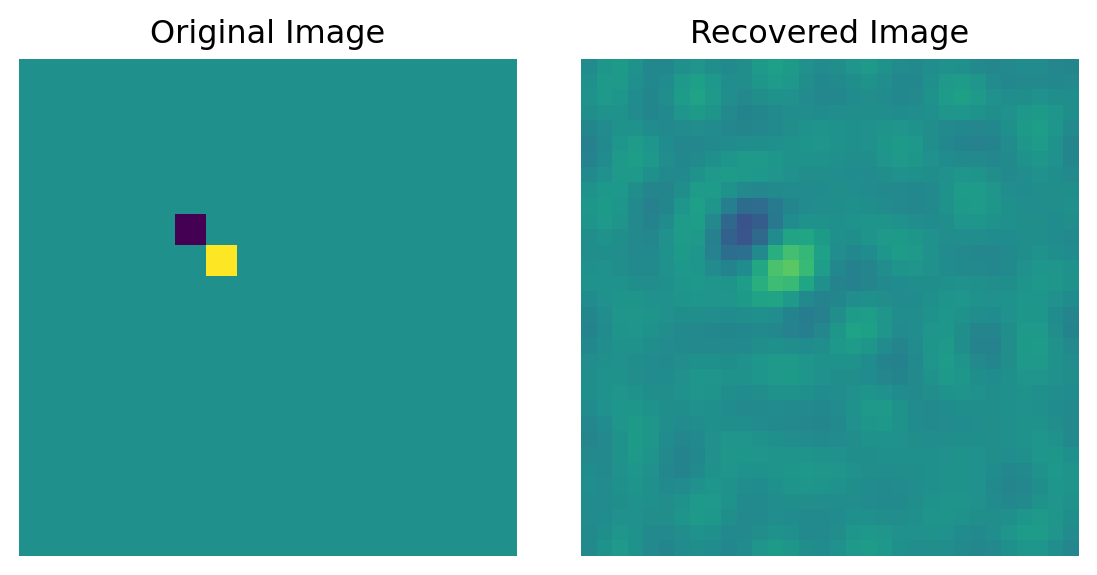

In [9]:
from tqdm import tqdm

def least_squares_sol(x0, b, Amv, Amv_adjoint, max_iter=1000, alpha=1e-3, tol=1e-6):
    """
    Solves the least squares problem using gradient descent with progress tracking.

    Parameters:
    - x0 (torch.Tensor): Initial guess for the solution.
    - b (torch.Tensor): Observation vector.
    - Amv (callable): Function to compute A @ x.
    - Amv_adjoint (callable): Function to compute A^T @ v.
    - max_iter (int): Maximum number of iterations.
    - alpha (float): Learning rate.
    - tol (float): Tolerance for convergence.

    Returns:
    - x (torch.Tensor): Approximated solution vector.
    """
    x = x0.clone()
    x.requires_grad = True
    b_noisy = b.clone() + 0.01 * torch.randn_like(b)

    # Initialize the progress bar
    with tqdm(total=max_iter, desc='Least Squares Iteration', unit='iter') as pbar:
        for i in range(max_iter):
            # Gradient descent update
            residual = Amv(x) - b_noisy
            gradient = Amv_adjoint(residual)
            xnext = x - alpha * gradient

            # Compute relative error
            error = torch.norm(xnext - x) 

            # Update the progress bar with the current error
            pbar.set_postfix({'Error': f'{error.item():.4e}'})
            pbar.update(1)

            # Check for convergence
            if error < tol:
                pbar.write(f'Converged at iteration {i+1} with error {error.item():.4e}')
                x = xnext
                break

            x = xnext

    return x

b = Amv(x)
x0 = torch.zeros_like(x)
xhat = least_squares_sol(x0, b, Amv, Amv_adjoint, max_iter=1000, alpha=1, tol=1e-6)

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.imshow(x[0, 0], cmap='viridis', vmin=-1, vmax=1)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(xhat.detach().numpy()[0, 0], cmap='viridis', vmin=-1, vmax=1)
plt.title('Recovered Image')
plt.axis('off')
plt.tight_layout()
plt.show()